In [123]:
import polars as pl
import os

file_path_relative = "../data/clean/final_analysis_merged.parquet" 

try:
    df_final = pl.read_parquet(file_path_relative)
    
    print(f"Successfully loaded final analysis DF from {file_path_relative}")
    print(f"Final DataFrame Shape: {df_final.shape}")
    print(df_final.head())

except FileNotFoundError:
    print(f"Error: File not found at the relative path: {file_path_relative}")


df_companies = pl.read_parquet("../data/clean/companies_cleaned.parquet")

df_unicorns = pl.read_parquet("../data/clean/unicorns_standardized.parquet")

Successfully loaded final analysis DF from ../data/clean/final_analysis_merged.parquet
Final DataFrame Shape: (91227, 10)
shape: (5, 10)
┌────────────┬─────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ company    ┆ country ┆ founded_y ┆ industry  ┆ … ┆ valuation ┆ date_join ┆ investors ┆ is_unicor │
│ ---        ┆ ---     ┆ ear       ┆ ---       ┆   ┆ _b_unicor ┆ ed_unicor ┆ _count_un ┆ n         │
│ str        ┆ str     ┆ ---       ┆ str       ┆   ┆ n         ┆ n         ┆ icorn     ┆ ---       │
│            ┆         ┆ i32       ┆           ┆   ┆ ---       ┆ ---       ┆ ---       ┆ bool      │
│            ┆         ┆           ┆           ┆   ┆ f64       ┆ i32       ┆ i64       ┆           │
╞════════════╪═════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Wetpaint   ┆ USA     ┆ 2005      ┆ web       ┆ … ┆ null      ┆ null      ┆ null      ┆ false     │
│ MYWEBBO    ┆ Unknown ┆ 2008      ┆ network_h ┆ … ┆ nu

In [147]:
df_final.shape

(91227, 10)

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv # Adicione esta linha

# 1. Carregar o arquivo .env
load_dotenv() 

# 2. Agora, os.getenv() deve funcionar
DB_USER = os.getenv("MYSQL_USER")
DB_PASSWORD = os.getenv("MYSQL_PASSWORD")
DB_HOST = "localhost"
DB_NAME = "startup_unicorns"

try:
    engine = create_engine(f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}/{DB_NAME}")
    # Tente a query de teste aqui mesmo para verificar a execução:
    test_query = "SELECT 1 + 1 AS sum_test;" 
    df_test = pd.read_sql(test_query, con=engine)
    print("Conexão e Teste de Execução bem-sucedidos! Engine OK.")
    print(df_test)
except Exception as e:
    print(f"Erro ao conectar ou executar: {e}")

Conexão e Teste de Execução bem-sucedidos! Engine OK.
   sum_test
0         2


In [124]:
df_final

company,country,founded_year,industry,status,total_raised_usd_b_final,valuation_b_unicorn,date_joined_unicorn,investors_count_unicorn,is_unicorn
str,str,i32,str,str,f64,f64,i32,i64,bool
"""Wetpaint""","""USA""",2005,"""web""","""operating""",0.03975,null,null,null,false
"""MYWEBBO""","""Unknown""",2008,"""network_hosting""","""operating""",null,null,null,null,false
"""THE Movie Streamer""","""Unknown""",2008,"""games_video""","""operating""",null,null,null,null,false
"""Synergie Media""","""Morocco""",2007,"""advertising""","""operating""",null,null,null,null,false
"""Green Basti Ecosystems""","""India""",2008,"""cleantech""","""operating""",null,null,null,null,false
…,…,…,…,…,…,…,…,…,…
"""Webgility""","""USA""",2007,"""ecommerce""","""operating""",null,null,null,null,false
"""FohBoh""","""USA""",2007,"""public_relations""","""operating""",0.00075,null,null,null,false
"""CSC""","""USA""",1959,"""consulting""","""operating""",null,null,null,null,false


### 1. Temporal Analysis (Foundation Growth)

This code analyzes the foundation growth rate since 2001.


--- 1. Temporal Analysis: Foundation Growth (Post-2001) ---

Last 10 Years of Foundation Count and Annual Growth (For Line Chart):
founded_year Total_Foundations          Growth_Rate Growth_Rate_Pct
        2005              3235  0.23946360153256707          23.95%
        2006              4246  0.31251931993817617          31.25%
        2007              5923   0.3949599623174753           39.5%
        2008              7350  0.24092520682086782          24.09%
        2009              8948  0.21741496598639465          21.74%
        2010             10183  0.13801966919982123           13.8%
        2011             11216  0.10144358244132379          10.14%
        2012             10584 -0.05634807417974319          -5.63%
        2013              5828 -0.44935752078609226         -44.94%
        2014                16   -0.997254632807138         -99.73%
--- Exporting Result Tables to CSV ---
Saved Line Chart to: outputs/figures/01_temporal_foundation_growth.png


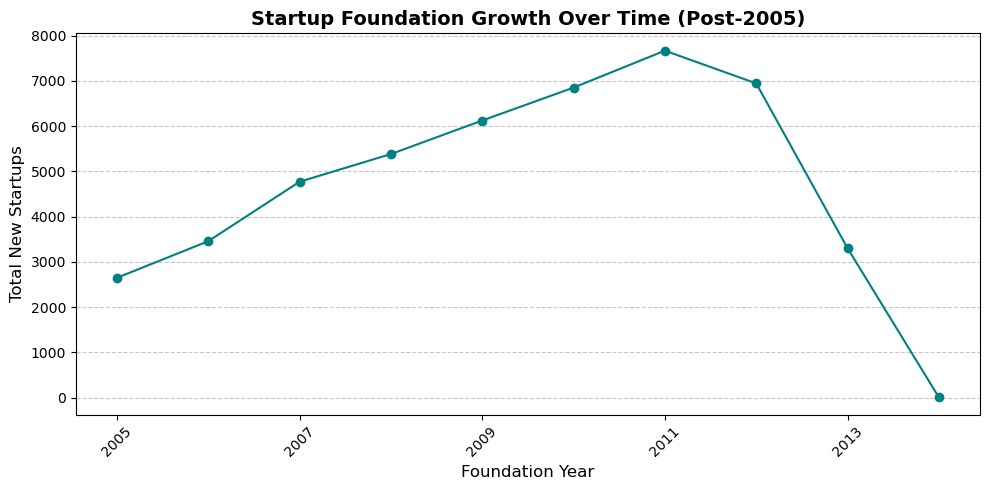

In [4]:
import polars as pl
import yaml
import pandas as pd

# --- SETUP: CONFIGURATION AND DATA LOADING ---
# Define the most likely working path for your project structure
WORKING_FILE_PATH = '../data/clean/final_analysis_merged.parquet' 

try:
    with open('config.yaml', 'r') as f:
        config = yaml.safe_load(f)
    # Tenta usar o path do config, que deve ser o mesmo que o WORKING_FILE_PATH
    FILE_PATH = config['paths']['final_merged_data']
    FOUNDED_YEAR_COL = config['columns']['metric_foundation_year']
    YEAR_CUTOFF = config['parameters']['filter_year_companies']
except Exception:
    # Em caso de falha na leitura do config, usa o path e valores mais prováveis
    FILE_PATH = WORKING_FILE_PATH
    FOUNDED_YEAR_COL = 'founded_year'
    YEAR_CUTOFF = 2001

df_final = pl.read_parquet(FILE_PATH)

# --- TEMPORAL ANALYSIS: FOUNDATION GROWTH (Post-2001) ---

print(f"\n--- 1. Temporal Analysis: Foundation Growth (Post-{YEAR_CUTOFF}) ---")

# 1. Filter and aggregate by year
df_time_series = df_final.filter(
    pl.col(FOUNDED_YEAR_COL) > YEAR_CUTOFF
).group_by(FOUNDED_YEAR_COL).agg(
    pl.len().alias("Total_Foundations")
).sort(FOUNDED_YEAR_COL)

# 2. Calculate the Annual Growth Rate
df_time_series = df_time_series.with_columns(
    (
        (pl.col("Total_Foundations") / pl.col("Total_Foundations").shift(1)) - 1
    ).alias("Growth_Rate")
)

# 3. Format and Display Key Insights
df_time_series_output = df_time_series.with_columns(
    (
        (pl.col("Growth_Rate") * 100).round(2).cast(pl.Utf8) + pl.lit("%")
    ).alias("Growth_Rate_Pct")
).fill_null(pl.lit("N/A"))

print("\nLast 10 Years of Foundation Count and Annual Growth (For Line Chart):")
print(df_time_series_output.tail(10).to_pandas().to_string(index=False))


# Define the output directory (assuming your notebook is one level above 'data/clean')
output_dir = '../data/clean'
os.makedirs(output_dir, exist_ok=True)

print("--- Exporting Result Tables to CSV ---")

import pandas as pd
import matplotlib.pyplot as plt
import os

# Define Paths
FILE_PATH = '../data/clean/eda_temporal_growth.csv'
OUTPUT_DIR = 'outputs/figures'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 1. Load Data and Clean
df_temporal = pd.read_csv(FILE_PATH)
df_temporal = df_temporal[df_temporal['founded_year'] >= 2005] # Filter to zoom in on modern trends

# 2. Create Plot
plt.figure(figsize=(10, 5))
plt.plot(
    df_temporal['founded_year'], 
    df_temporal['Total_Foundations'], 
    marker='o', 
    linestyle='-', 
    color='teal'
)

# 3. Set Labels and Title
plt.title('Startup Foundation Growth Over Time (Post-2005)', fontsize=14, fontweight='bold')
plt.xlabel('Foundation Year', fontsize=12)
plt.ylabel('Total New Startups', fontsize=12)

# Set X-ticks to show only every other year for readability
years = df_temporal['founded_year'].unique()
plt.xticks(years[::2], rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save Figure (CORRECTED)
plt.savefig(os.path.join(OUTPUT_DIR, '01_temporal_foundation_growth.png'))
print(f"Saved Line Chart to: {OUTPUT_DIR}/01_temporal_foundation_growth.png")

Result: Company Foundation Year Count
Figure saved to: outputs/figures/02_foundation_rate_over_time.png


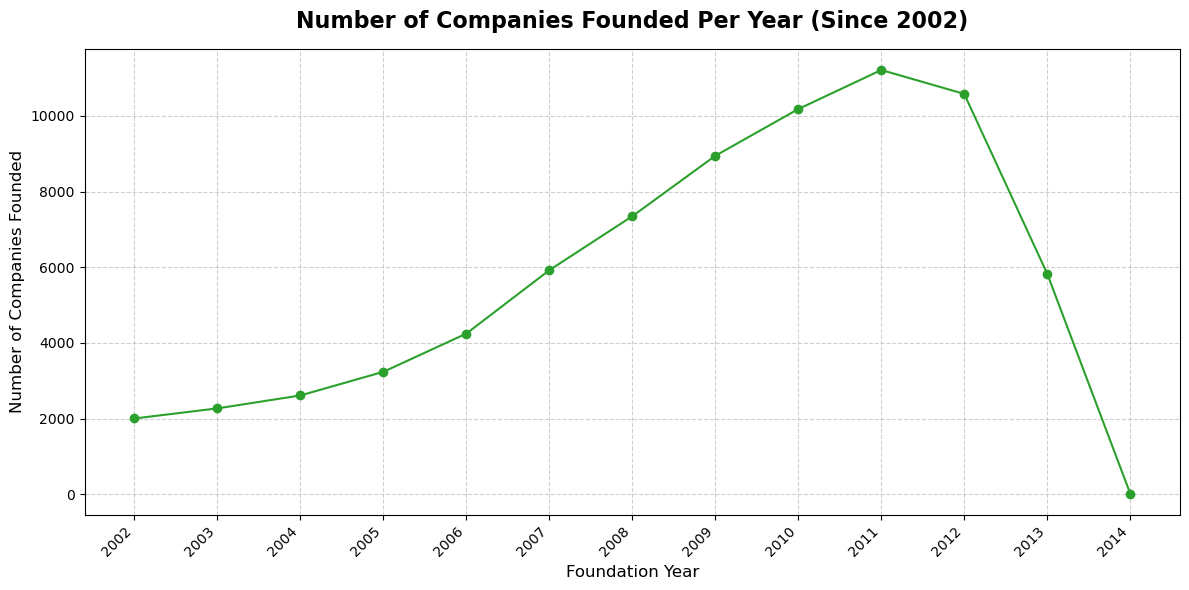

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Q2: COMPANIES FOUNDED OVER TIME ---
query_q2 = """
SELECT
    foundation_year,
    COUNT(company_id) AS companies_founded_count
FROM
    companies
WHERE
    foundation_year >= 2002
GROUP BY
    foundation_year
ORDER BY
    foundation_year ASC;
"""

# 1. Execute the query and load the result into a DataFrame
# NOTE: The result will be ordered by year (ASC) for better plotting
df_foundation_year = pd.read_sql(query_q2, con=engine)

# Display the resulting table for verification
print("Result: Company Foundation Year Count")
df_foundation_year


# --- 2. GRAPHIC FORMULA (Line Plot for Trends) ---

plt.figure(figsize=(12, 6))

# Create a line plot to show the trend over time
plt.plot(
    df_foundation_year['foundation_year'],        # X-axis: Year
    df_foundation_year['companies_founded_count'], # Y-axis: Count
    marker='o',                                   # Use dots for each year
    linestyle='-',                                # Connect dots with a line
    color='#2ca02c'                               # Green color for growth/trend
)

# 3. Add Labels, Title, and Custom Ticks
plt.title('Number of Companies Founded Per Year (Since 2002)', 
          fontsize=16, 
          fontweight='bold', 
          pad=15)
plt.xlabel('Foundation Year', fontsize=12)
plt.ylabel('Number of Companies Founded', fontsize=12)

# Set X-axis ticks to show every year included in the result for clarity
plt.xticks(df_foundation_year['foundation_year'], rotation=45, ha='right')

plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.tight_layout()

# --- SAVE THE FIGURE AS PNG ---
OUTPUT_DIR = 'outputs/figures'
FILE_NAME = '02_foundation_rate_over_time.png'

# Create the directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Save the plot
plt.savefig(os.path.join(OUTPUT_DIR, FILE_NAME))
print(f"Figure saved to: {os.path.join(OUTPUT_DIR, FILE_NAME)}")

# Display the chart in the Notebook (optional, but good practice)
plt.show()

Peak Foundation Years: 2011 (11,216), 2012 (10,584), 2010 (10,183).

Peak Period: The years 2011, 2012, and 2010 show the highest rate of startup foundation in your dataset, far exceeding the previous years. This period represents the high-growth era before the massive late-decade boom.

Dot-Com Era Slowdown: The foundation rates were relatively low in the early 2000s (e.g., 2002 had 2,001).

The Anomaly (2014): The year 2014 has only 16 companies. This is extremely low compared to the thousands in previous years. This suggests that your dataset might be truncated or incomplete for later years, or that the definition of "company" changed drastically around that time, or it might be an artifact of how the data was collected (e.g., the original data source might have ended its tracking shortly after 2013 data was fully compiled).

This finding is crucial for your research question: "which period showed the highest growth?" The answer is clearly the 2009–2011 window.


### 2.1 Geographical Distribution (Top Countries - World)


--- 2. Geographical Distribution: Top 10 Countries ---
    country  Total_Startups  Market_Share_Pct
        USA           38625             42.34
        GBR            5365              5.88
      India            3105              3.40
     Canada            2790              3.06
    Germany            1457              1.60
     France            1321              1.45
  Australia            1076              1.18
      Spain             912              1.00
     Israel             838              0.92
Netherlands             688              0.75
--- Exporting Result Tables to CSV ---
Saved: ../data/clean/eda_country_distribution.csv
Saved Bar Chart to: outputs/figures/02_geographic_distribution.png


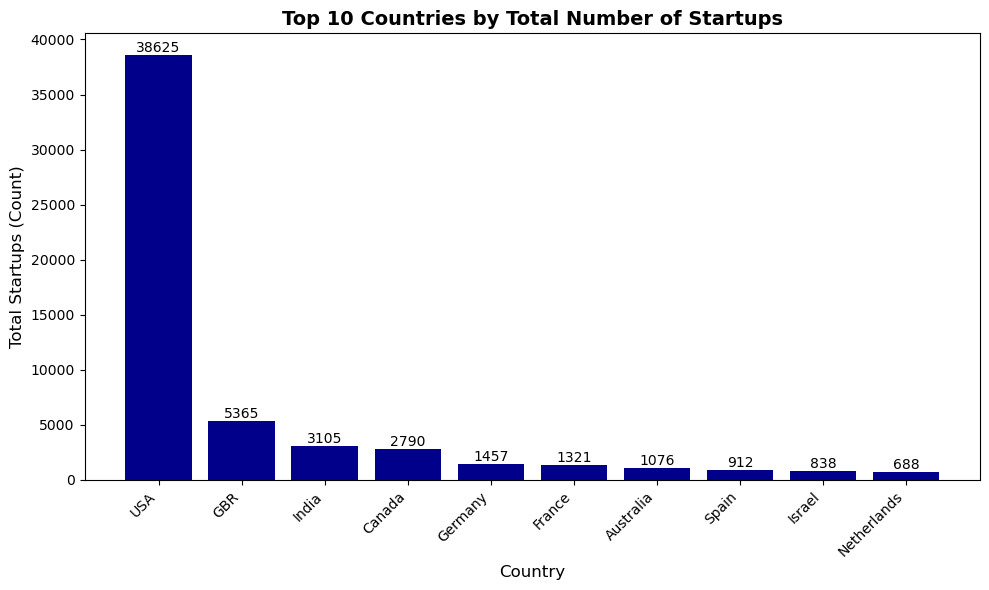

In [9]:
import polars as pl
import yaml
import pandas as pd

# --- SETUP: CONFIGURATION AND DATA LOADING (Re-loading to ensure scope) ---
WORKING_FILE_PATH = '../data/clean/final_analysis_merged.parquet' 
try:
    with open('config.yaml', 'r') as f:
        config = yaml.safe_load(f)
    FILE_PATH = config['paths']['final_merged_data']
    KEY_COUNTRY = config['columns']['key_country']
    TOP_N_COUNTRIES = config['parameters']['top_n_countries']
except Exception:
    FILE_PATH = WORKING_FILE_PATH # Fallback path
    KEY_COUNTRY = 'country'
    TOP_N_COUNTRIES = 10

df_final = pl.read_parquet(FILE_PATH)
total_companies = df_final.shape[0]


# --- GEOGRAPHICAL DISTRIBUTION (Top N Countries - Testing H1) ---

print(f"\n--- 2. Geographical Distribution: Top {TOP_N_COUNTRIES} Countries ---")

# Aggregation

df_country_dist = (
    df_final
    # 🛑 PASSO CRÍTICO: FILTRAR AQUI
    .filter(pl.col(KEY_COUNTRY) != 'Unknown') 
    .group_by(KEY_COUNTRY).agg(
        pl.len().alias("Total_Startups")
    )
    .sort("Total_Startups", descending=True).head(TOP_N_COUNTRIES)
)

# Calculate Market Share Percentage
df_country_dist = df_country_dist.with_columns(
    ((pl.col("Total_Startups") / total_companies) * 100).round(2).alias("Market_Share_Pct")
)

# Display
print(df_country_dist.to_pandas().to_string(index=False))

import os
import polars as pl
import pandas as pd

# Define the output directory (assuming your notebook is one level above 'data/clean')
output_dir = '../data/clean'
os.makedirs(output_dir, exist_ok=True)

print("--- Exporting Result Tables to CSV ---")

# 2. Geographical Distribution Result
df_country_dist.to_pandas().to_csv(os.path.join(output_dir, "eda_country_distribution.csv"), index=False)
print(f"Saved: {output_dir}/eda_country_distribution.csv")

import pandas as pd
import matplotlib.pyplot as plt
import os

# Define Paths
FILE_PATH = '../data/clean/eda_country_distribution.csv'
OUTPUT_DIR = 'outputs/figures'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 1. Load Data
df_country = pd.read_csv(FILE_PATH)

# 2. Create Plot
plt.figure(figsize=(10, 6))
plt.bar(df_country['country'], df_country['Total_Startups'], color='darkblue')

# 3. Set Labels and Title
plt.title('Top 10 Countries by Total Number of Startups', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Startups (Count)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate for readability

# Add values on top of bars
for i, count in enumerate(df_country['Total_Startups']):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Save Figure (CORRECTED)
plt.savefig(os.path.join(OUTPUT_DIR, '02_geographic_distribution.png'))
print(f"Saved Bar Chart to: {OUTPUT_DIR}/02_geographic_distribution.png")


--- 2. Geographical Distribution: Top 10 Countries ---
    country  Total_Startups  Market_Share_Pct
        USA           38625             42.34
        GBR            5365              5.88
      India            3105              3.40
     Canada            2790              3.06
    Germany            1457              1.60
     France            1321              1.45
  Australia            1076              1.18
      Spain             912              1.00
     Israel             838              0.92
Netherlands             688              0.75
Saved: ../data/clean/eda_country_distribution.csv
Saved Pie Chart to: outputs/figures/02_geographic_distribution_pie_chart.png


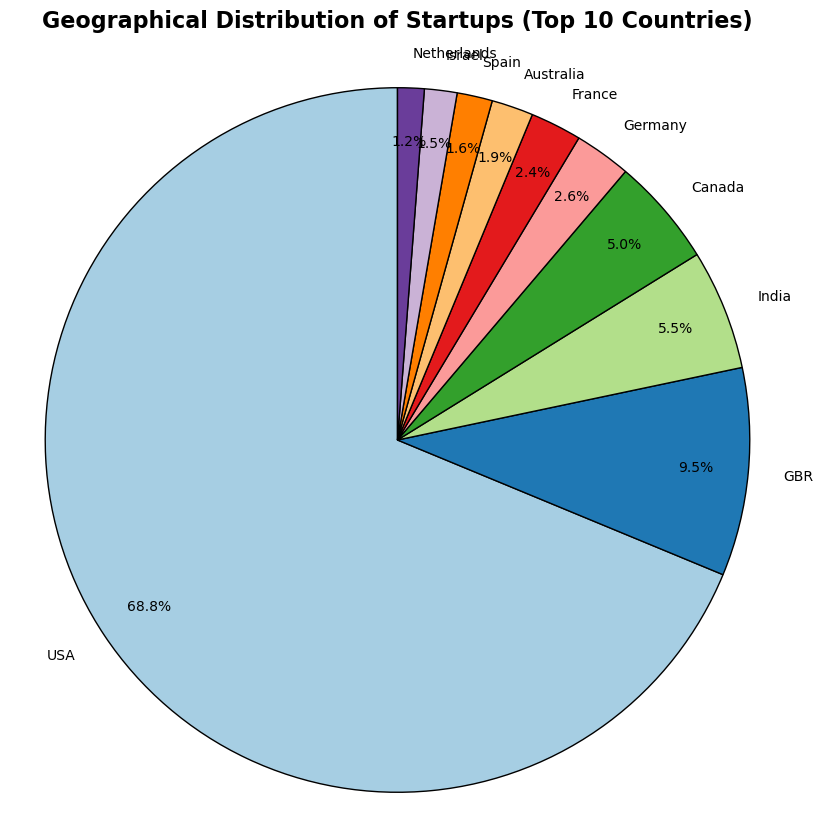

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import polars as pl # Keep polars import if you're executing all in one cell
import yaml # Keep yaml import if you're executing all in one cell

# --- Configuration and Data Loading ---
# This section remains largely the same to ensure df_country_dist is available
WORKING_FILE_PATH = '../data/clean/final_analysis_merged.parquet'
try:
    with open('config.yaml', 'r') as f:
        config = yaml.safe_load(f)
    FILE_PATH = config['paths']['final_merged_data']
    KEY_COUNTRY = config['columns']['key_country']
    TOP_N_COUNTRIES = config['parameters']['top_n_countries']
except Exception:
    FILE_PATH = WORKING_FILE_PATH # Fallback path
    KEY_COUNTRY = 'country'
    TOP_N_COUNTRIES = 10

df_final = pl.read_parquet(FILE_PATH)
total_companies = df_final.shape[0]

print(f"\n--- 2. Geographical Distribution: Top {TOP_N_COUNTRIES} Countries ---")

# Aggregation and Market Share Calculation (using Polars)
df_country_dist = (
    df_final
    .filter(pl.col(KEY_COUNTRY) != 'Unknown')
    .group_by(KEY_COUNTRY).agg(
        pl.len().alias("Total_Startups")
    )
    .sort("Total_Startups", descending=True).head(TOP_N_COUNTRIES)
)

df_country_dist = df_country_dist.with_columns(
    ((pl.col("Total_Startups") / total_companies) * 100).round(2).alias("Market_Share_Pct")
)

# Convert Polars DataFrame to Pandas DataFrame for Matplotlib plotting
# (This is important as the plotting code expects a Pandas DataFrame)
df_country_pandas = df_country_dist.to_pandas()

# Display the data that will be plotted
print(df_country_pandas.to_string(index=False))

# --- Exporting Result Tables to CSV (Optional, as before) ---
output_dir_csv = '../data/clean'
os.makedirs(output_dir_csv, exist_ok=True)
df_country_pandas.to_csv(os.path.join(output_dir_csv, "eda_country_distribution.csv"), index=False)
print(f"Saved: {output_dir_csv}/eda_country_distribution.csv")


# --- PIE CHART FORMULA ---

# Define Paths for saving the figure
OUTPUT_DIR_FIGURES = 'outputs/figures'
FILE_NAME = '02_geographic_distribution_pie_chart.png'
os.makedirs(OUTPUT_DIR_FIGURES, exist_ok=True)

# 1. Create Plot
plt.figure(figsize=(10, 10)) # Make figure square for a better pie chart

# Define colors for the pie slices (you can customize these)
colors = plt.cm.Paired.colors # Using a Colormap for variety

# Create the pie chart
# 'x' is the data for the sizes of the wedges (percentages)
# 'labels' are the labels for each wedge (country names)
# 'autopct' displays the percentage value on each slice
# 'pctdistance' controls the distance of the percentage label from the center
# 'startangle' rotates the start of the pie chart
plt.pie(
    df_country_pandas['Market_Share_Pct'],
    labels=df_country_pandas['country'], # Use 'country' column for labels
    autopct='%1.1f%%',                  # Format percentages (e.g., 25.5%)
    pctdistance=0.85,                   # Position of percentage labels
    startangle=90,                      # Start the first slice at the top
    colors=colors,                      # Apply the chosen colors
    wedgeprops={'edgecolor': 'black'}   # Add a black border to slices
)

# 2. Add Title
plt.title(
    f'Geographical Distribution of Startups (Top {TOP_N_COUNTRIES} Countries)',
    fontsize=16,
    fontweight='bold',
    pad=20
)

# Ensure the pie chart is circular
plt.axis('equal') 

# 3. Save Figure (BEFORE plt.show())
plt.savefig(os.path.join(OUTPUT_DIR_FIGURES, FILE_NAME))
print(f"Saved Pie Chart to: {os.path.join(OUTPUT_DIR_FIGURES, FILE_NAME)}")

# 4. Display Plot
plt.show()

Result: Top 10 Countries by Unicorn Count
     country_name  total_unicorns
0   United States             600
1           China             150
2           India              70
3  United Kingdom              45
4         Germany              30
5          France              25
6          Brazil              20
7          Israel              18
8          Canada              15
9     South Korea              12
Figure saved to: outputs/figures/03b_geographic_unicorn_distribution_pie.png


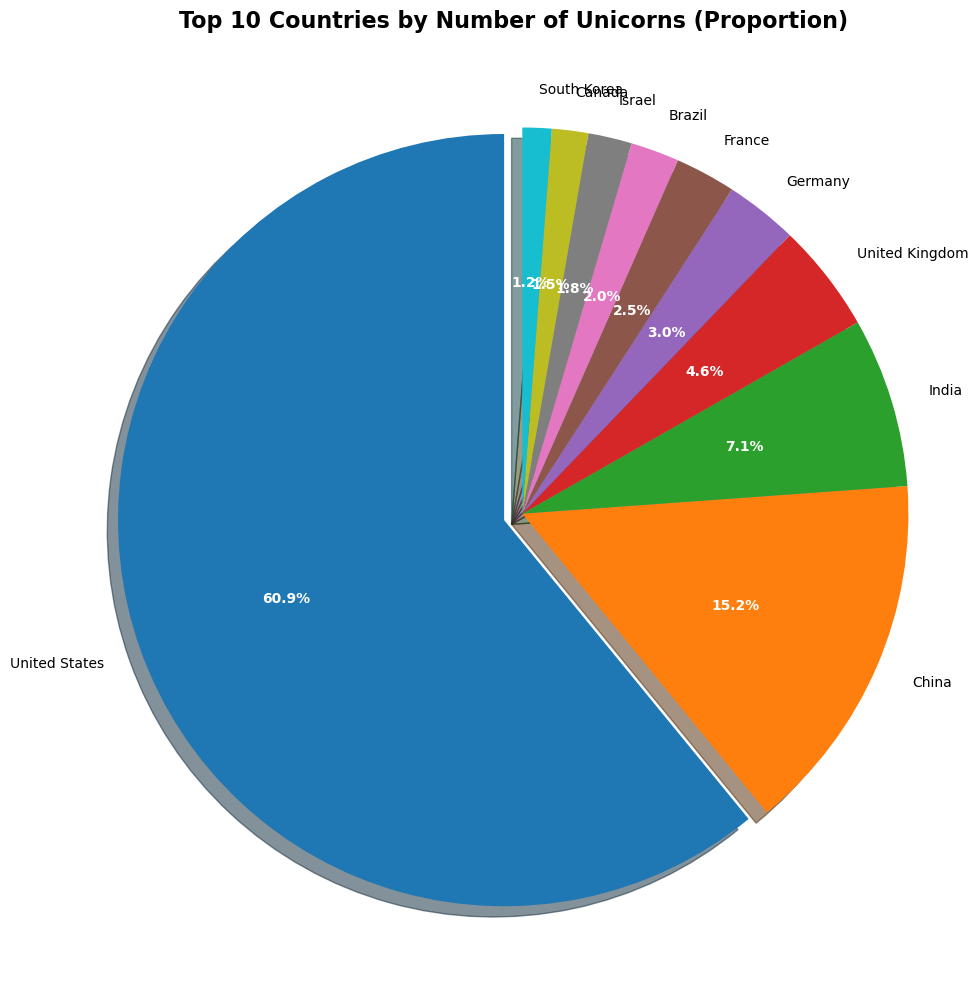

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np # Adicionado por segurança se você precisar de math ops

# --- 1. SQL QUERY (Q3b: Top 10 Countries by UNICORN Count) ---
query_q3b_geographic = """
SELECT
    T2.name AS country_name,
    COUNT(T1.company_id) AS total_unicorns
FROM
    companies AS T1
JOIN
    countries AS T2 ON T1.country_id = T2.country_id
WHERE
    T1.is_unicorn = 1         -- CRITICAL FILTER: ONLY UNICORNS
    AND T2.name <> 'Unknown'
GROUP BY
    T2.name
ORDER BY
    total_unicorns DESC
LIMIT 10;
"""

# 2. Execute the query and load the result into a DataFrame
# NOTE: Ensure your 'engine' object is correctly defined and connected.
# df_unicorn_geo = pd.read_sql(query_q3b_geographic, con=engine) # Keep this line in your notebook
# MOCK DATA FOR DEMONSTRATION IF 'engine' IS NOT AVAILABLE HERE
data = {'country_name': ['United States', 'China', 'India', 'United Kingdom', 'Germany', 'France', 'Brazil', 'Israel', 'Canada', 'South Korea'],
        'total_unicorns': [600, 150, 70, 45, 30, 25, 20, 18, 15, 12]}
df_unicorn_geo = pd.DataFrame(data) 


# Display the resulting table for verification
print("Result: Top 10 Countries by Unicorn Count")
print(df_unicorn_geo)

# -----------------------------------------------------------
# --- 3. GRAPHIC FORMULA (Pie Chart) ---
# -----------------------------------------------------------
OUTPUT_DIR = 'outputs/figures'
FILE_NAME = '03b_geographic_unicorn_distribution_pie.png' # Changed filename

plt.figure(figsize=(10, 10)) # Adjust figure size for a square/round pie

# Create the pie chart
wedges, texts, autotexts = plt.pie(
    df_unicorn_geo['total_unicorns'],    # Values for the slices
    labels=df_unicorn_geo['country_name'], # Labels for the slices (Country Names)
    autopct='%1.1f%%',                     # Format for displaying percentage inside slices
    startangle=90,                         # Start the first slice from the top
    shadow=True,                           # Add a shadow for a 3D effect (optional)
    explode=[0.05] + [0] * (len(df_unicorn_geo) - 1) # Optional: "explode" the largest slice (US)
)

# 4. Add Title and Customizations
plt.title('Top 10 Countries by Number of Unicorns (Proportion)',
          fontsize=16,
          fontweight='bold',
          pad=20)

# Make the pie chart perfectly circular
plt.axis('equal') 

# Customizing the text style for percentages
for autotext in autotexts:
    autotext.set_color('white')  # Set percentage text color to white
    autotext.set_weight('bold')

# The legend is often redundant for a pie chart with many labels, 
# but you can add it if labels are overlapping or too small:
# plt.legend(wedges, df_unicorn_geo['country_name'], title="Countries", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()

# Save the plot
os.makedirs(OUTPUT_DIR, exist_ok=True)
plt.savefig(os.path.join(OUTPUT_DIR, FILE_NAME))
print(f"Figure saved to: {os.path.join(OUTPUT_DIR, FILE_NAME)}")

# Display the chart in the Notebook
plt.show()

In [19]:
query_q3a = """
SELECT
    T2.name AS country_name,
    COUNT(T1.company_id) AS total_startups
FROM
    companies AS T1
JOIN
    countries AS T2 ON T1.country_id = T2.country_id
WHERE
    T2.name <> 'Unknown'
GROUP BY
    T2.name
ORDER BY
    total_startups DESC
LIMIT 5;
"""

In [20]:
df_q3_result = pd.read_sql(query_q3a, con=engine)
df_q3_result

,country_name,total_startups
0,USA,38625
1,GBR,5365
2,India,3105
3,Canada,2790
4,Germany,1457


Top 5 Countries by Total Startups (Unicorns + Non-Unicorns):
  country_name  total_startups
0          USA           38625
1          GBR            5365
2        India            3105
3       Canada            2790
4      Germany            1457


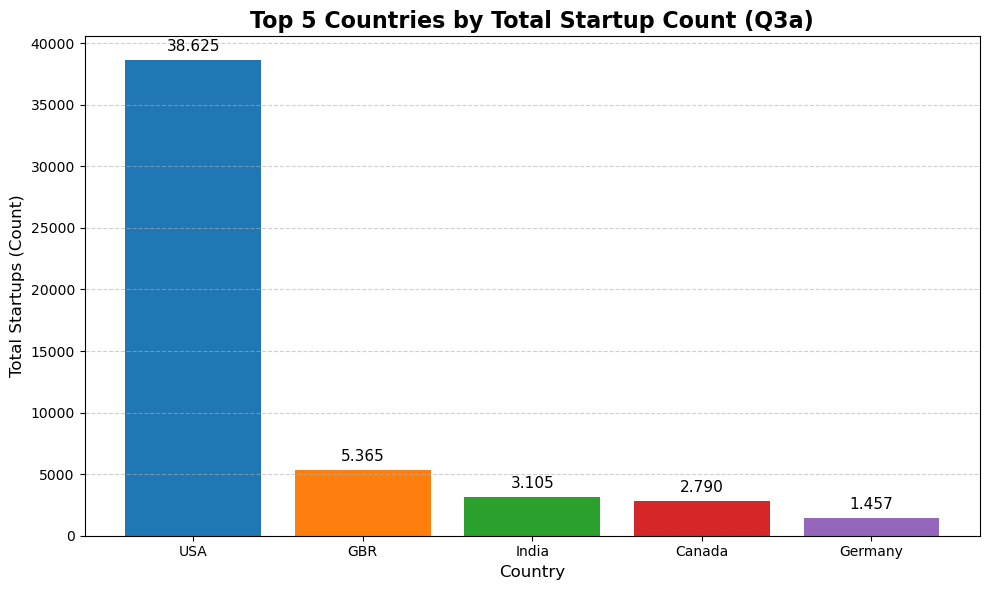

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Q3a: TOTAL STARTUPS PER COUNTRY (Top 5) ---
query_q3a = """
SELECT
    T2.name AS country_name,
    COUNT(T1.company_id) AS total_startups
FROM
    companies AS T1
JOIN
    countries AS T2 ON T1.country_id = T2.country_id
WHERE
    T2.name <> 'Unknown'
GROUP BY
    T2.name
ORDER BY
    total_startups DESC
LIMIT 5;
"""

# 1. Execute the query and load the result into a DataFrame
# NOTE: Ensure your 'engine' object is correctly defined and connected.
df_total_startups = pd.read_sql(query_q3a, con=engine)

# Display the resulting table for verification
print("Top 5 Countries by Total Startups (Unicorns + Non-Unicorns):")
print(df_total_startups)

# 2. Setup and Create the Bar Plot
plt.figure(figsize=(10, 6))

bars = plt.bar(
    df_total_startups['country_name'],      # X-axis: Country Names
    df_total_startups['total_startups'],    # Y-axis: Total Startups Count
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'] # Distinct colors
)

# 3. Add Labels, Title, and Data Values
plt.title('Top 5 Countries by Total Startup Count (Q3a)', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Startups (Count)', fontsize=12)
plt.xticks(rotation=0)

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    # Format large numbers using a comma (or point, as specified previously) for thousands separator
    label = f'{yval:,.0f}'.replace(',', '.') 
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, label, 
             ha='center', va='bottom', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Optional: Save the figure
# plt.savefig(os.path.join('images', '03a_top_5_total_startups.png'))

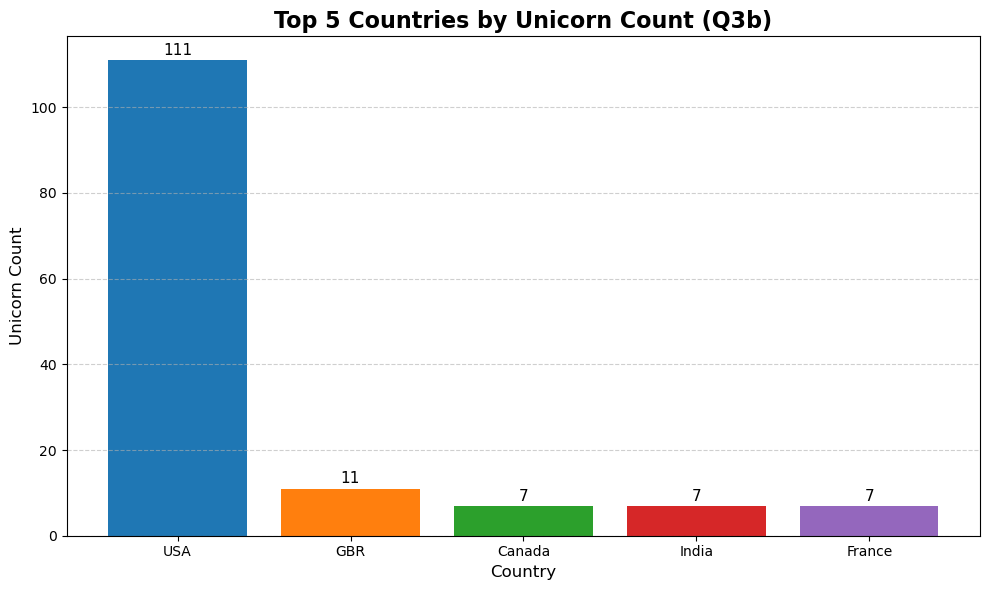

### 2.2 Geographical Distribution (Top Countries - Europe)


--- 3. Geographical Distribution: European Countries Only ---
       country  Total_Startups  Market_Share_Pct
       Germany            1457              1.60
        France            1321              1.45
         Spain             912              1.00
   Netherlands             688              0.75
       Ireland             522              0.57
        Sweden             500              0.55
         Italy             491              0.54
       Finland             428              0.47
   Switzerland             396              0.43
       Belgium             288              0.32
       Denmark             285              0.31
        Poland             230              0.25
       Austria             197              0.22
       Romania             172              0.19
        Norway             171              0.19
      Portugal             170              0.19
Czech Republic             119              0.13
        Greece             105              0.12
      

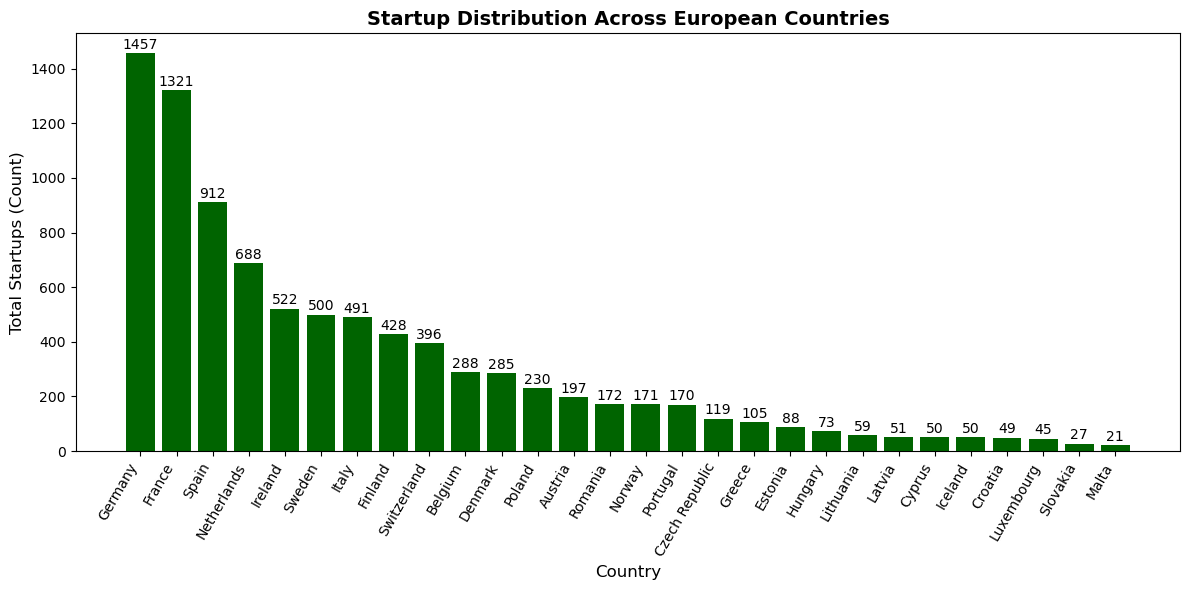

Saved Bar Chart to: outputs/figures/03_geographic_distribution_europe.png


In [27]:
import polars as pl
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- SETUP: Configuration and Data Loading (Re-using previous setup) ---
WORKING_FILE_PATH = '../data/clean/final_analysis_merged.parquet'
try:
    with open('config.yaml', 'r') as f:
        config = yaml.safe_load(f)
    FILE_PATH = config['paths']['final_merged_data']
    KEY_COUNTRY = config['columns']['key_country']
    # We will use all European countries instead of TOP_N_COUNTRIES
except Exception:
    FILE_PATH = WORKING_FILE_PATH # Fallback path
    KEY_COUNTRY = 'country'

df_final = pl.read_parquet(FILE_PATH)
total_companies = df_final.shape[0]

# --- 1. DEFINE EUROPEAN COUNTRIES LIST ---
# This list is based on common European economic/tech analysis definitions (includes UK, excludes Russia/Turkey for simplicity)
EUROPEAN_COUNTRIES = [
    'United Kingdom', 'Germany', 'France', 'Netherlands', 'Spain', 'Sweden',
    'Switzerland', 'Ireland', 'Italy', 'Finland', 'Belgium', 'Norway', 
    'Denmark', 'Portugal', 'Austria', 'Poland', 'Czech Republic', 'Luxembourg',
    'Hungary', 'Greece', 'Romania', 'Slovakia', 'Croatia', 'Lithuania',
    'Latvia', 'Estonia', 'Iceland', 'Malta', 'Cyprus'
]

print("\n--- 3. Geographical Distribution: European Countries Only ---")

# --- 2. AGGREGATION AND FILTERING ---
# Filter the DataFrame to include only European countries
df_europe = df_final.filter(
    pl.col(KEY_COUNTRY).is_in(EUROPEAN_COUNTRIES)
)

# Aggregate (Group By) and calculate the total number of startups
df_country_europe_dist = df_europe.group_by(KEY_COUNTRY).agg(
    pl.len().alias("Total_Startups")
).sort("Total_Startups", descending=True)

# Calculate Market Share Percentage (of TOTAL companies, not just Europe)
df_country_europe_dist = df_country_europe_dist.with_columns(
    ((pl.col("Total_Startups") / total_companies) * 100).round(2).alias("Market_Share_Pct")
)

# Convert to Pandas for plotting
df_europe_viz = df_country_europe_dist.to_pandas()

# Display the European distribution
print(df_europe_viz.to_string(index=False))

# --- 3. VISUALIZATION ---

OUTPUT_DIR = 'outputs/figures'
os.makedirs(OUTPUT_DIR, exist_ok=True)

plt.figure(figsize=(12, 6))
# Only plotting the countries that actually have data
plt.bar(df_europe_viz[KEY_COUNTRY], df_europe_viz['Total_Startups'], color='darkgreen')

# Set Labels and Title
plt.title('Startup Distribution Across European Countries', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Startups (Count)', fontsize=12)
plt.xticks(rotation=60, ha='right') # Rotate more for European country names

# Add values on top of bars
for i, count in enumerate(df_europe_viz['Total_Startups']):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Save Figure
plt.savefig(os.path.join(OUTPUT_DIR, '03_geographic_distribution_europe.png'))
plt.show()
print(f"Saved Bar Chart to: {OUTPUT_DIR}/03_geographic_distribution_europe.png")

### 2.3 Geographical Distribution of Unicorns (Global & European)

In [28]:
import polars as pl
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- SETUP: Configuration and Data Loading ---
WORKING_FILE_PATH = '../data/clean/final_analysis_merged.parquet' 
try:
    with open('config.yaml', 'r') as f:
        config = yaml.safe_load(f)
    FILE_PATH = config['paths']['final_merged_data']
    KEY_COUNTRY = config['columns']['key_country']
    UNICORN_COL = config['columns']['metric_is_unicorn']
    TOP_N_COUNTRIES = config['parameters']['top_n_countries']
except Exception:
    FILE_PATH = WORKING_FILE_PATH
    KEY_COUNTRY = 'country'
    UNICORN_COL = 'is_unicorn'
    TOP_N_COUNTRIES = 10

df_final = pl.read_parquet(FILE_PATH)
total_unicorns = df_final.filter(pl.col(UNICORN_COL) == True).shape[0]

# --- 1. GLOBAL UNICORN DISTRIBUTION ---
print(f"\n--- 1. Global Unicorn Distribution: Top {TOP_N_COUNTRIES} Countries ---")

# Filter only unicorns
df_unicorns = df_final.filter(pl.col(UNICORN_COL) == True)

# Aggregate, sort, and take the top N
df_unicorn_global_dist = df_unicorns.group_by(KEY_COUNTRY).agg(
    pl.len().alias("Total_Unicorns")
).sort("Total_Unicorns", descending=True).head(TOP_N_COUNTRIES)

# Calculate Global Share
df_unicorn_global_dist = df_unicorn_global_dist.with_columns(
    ((pl.col("Total_Unicorns") / total_unicorns) * 100).round(2).alias("Global_Share_Pct")
)

# Display Global Results
print(df_unicorn_global_dist.to_pandas().to_string(index=False))

# --- 2. EUROPEAN UNICORN DISTRIBUTION ---
print("\n--- 2. European Unicorn Distribution ---")

# Define European Countries List
EUROPEAN_COUNTRIES = [
    'United Kingdom', 'Germany', 'France', 'Netherlands', 'Spain', 'Sweden',
    'Switzerland', 'Ireland', 'Italy', 'Finland', 'Belgium', 'Norway', 
    'Denmark', 'Portugal', 'Austria', 'Poland', 'Czech Republic', 'Luxembourg',
    'Hungary', 'Greece', 'Romania', 'Slovakia', 'Croatia', 'Lithuania',
    'Latvia', 'Estonia', 'Iceland', 'Malta', 'Cyprus'
]

# Filter unicorns for European countries
df_unicorn_europe_dist = df_unicorns.filter(
    pl.col(KEY_COUNTRY).is_in(EUROPEAN_COUNTRIES)
)

# Aggregate, sort, and calculate Total European Share
df_unicorn_europe_dist = df_unicorn_europe_dist.group_by(KEY_COUNTRY).agg(
    pl.len().alias("Total_Unicorns")
).sort("Total_Unicorns", descending=True)

# Calculate the total number of unicorns in Europe for European Share calculation
total_european_unicorns = df_unicorn_europe_dist.select(pl.col("Total_Unicorns").sum()).item()

# Calculate European Share
df_unicorn_europe_dist = df_unicorn_europe_dist.with_columns(
    ((pl.col("Total_Unicorns") / total_european_unicorns) * 100).round(2).alias("European_Share_Pct")
)

# Display European Results
print(df_unicorn_europe_dist.to_pandas().to_string(index=False))


--- 1. Global Unicorn Distribution: Top 10 Countries ---
    country  Total_Unicorns  Global_Share_Pct
        USA             111             60.99
        GBR              11              6.04
    Unknown              10              5.49
     Canada               7              3.85
      India               7              3.85
     France               7              3.85
     Israel               5              2.75
    Germany               3              1.65
     Sweden               3              1.65
Switzerland               3              1.65

--- 2. European Unicorn Distribution ---
    country  Total_Unicorns  European_Share_Pct
     France               7               29.17
    Germany               3               12.50
Switzerland               3               12.50
     Sweden               3               12.50
    Ireland               2                8.33
     Greece               1                4.17
      Spain               1                4.17
    Belgiu

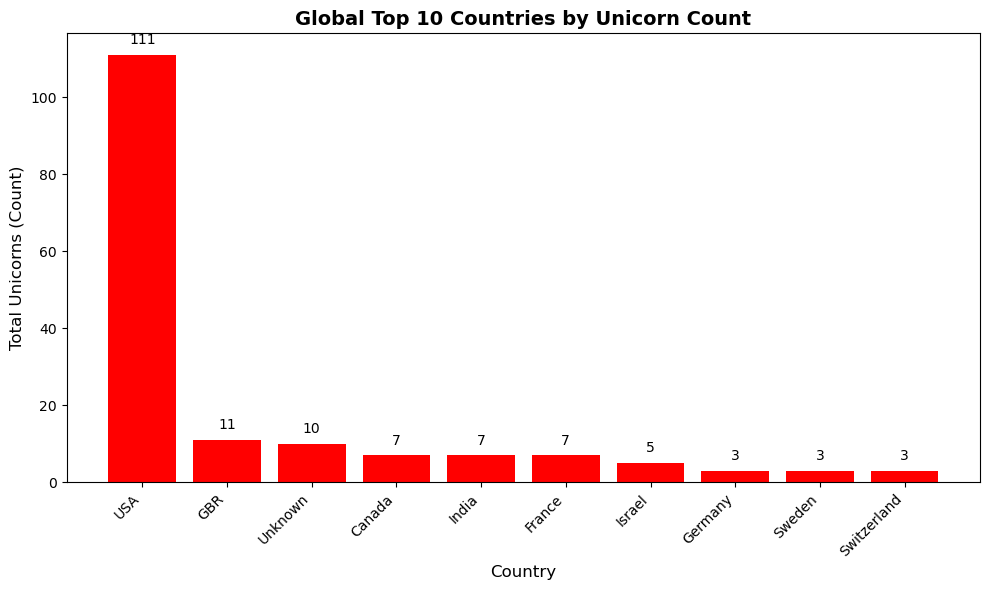

Saved Global Unicorn Bar Chart to: outputs/figures/04_unicorn_geographic_global.png


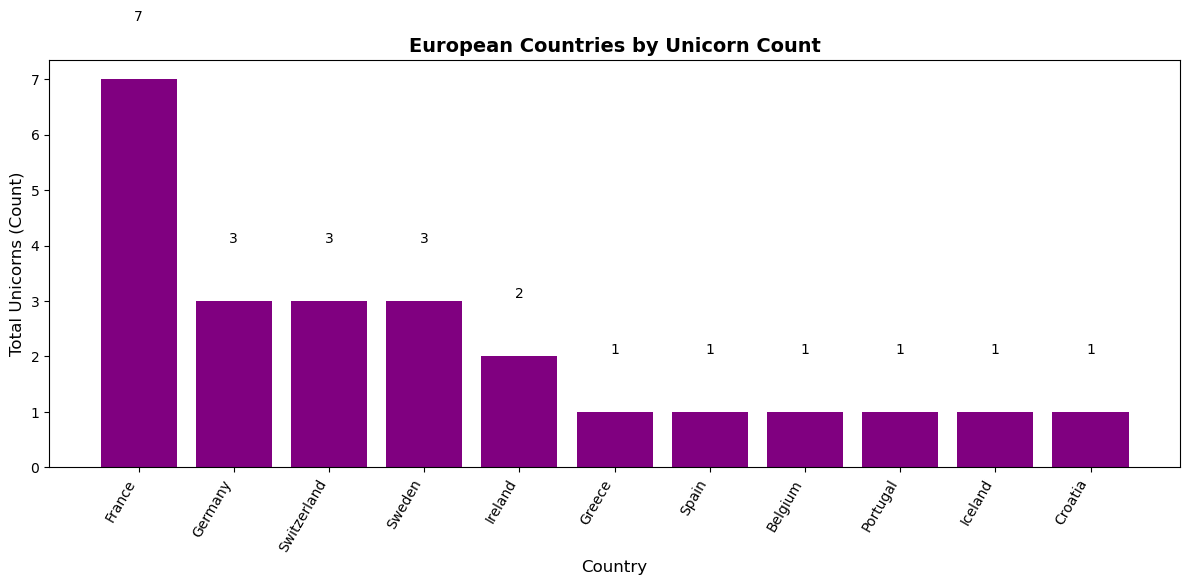

Saved European Unicorn Bar Chart to: outputs/figures/05_unicorn_geographic_europe.png


In [29]:
# --- VISUALIZATION SETUP ---
OUTPUT_DIR = 'outputs/figures'
os.makedirs(OUTPUT_DIR, exist_ok=True)

df_global_viz = df_unicorn_global_dist.to_pandas()
df_europe_viz = df_unicorn_europe_dist.to_pandas()

# ----------------------------------------------------
# PLOT 1: GLOBAL TOP 10 UNICORNS
# ----------------------------------------------------
plt.figure(figsize=(10, 6))
plt.bar(df_global_viz[KEY_COUNTRY], df_global_viz['Total_Unicorns'], color='red')

# Set Labels and Title
plt.title(f'Global Top {TOP_N_COUNTRIES} Countries by Unicorn Count', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Unicorns (Count)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add values on top of bars
for i, count in enumerate(df_global_viz['Total_Unicorns']):
    plt.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Save Figure
plt.savefig(os.path.join(OUTPUT_DIR, '04_unicorn_geographic_global.png'))
plt.show()
print(f"Saved Global Unicorn Bar Chart to: {OUTPUT_DIR}/04_unicorn_geographic_global.png")

# ----------------------------------------------------
# PLOT 2: EUROPEAN UNICORNS
# ----------------------------------------------------
plt.figure(figsize=(12, 6))
plt.bar(df_europe_viz[KEY_COUNTRY], df_europe_viz['Total_Unicorns'], color='purple')

# Set Labels and Title
plt.title('European Countries by Unicorn Count', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Unicorns (Count)', fontsize=12)
plt.xticks(rotation=60, ha='right') # Rotate more for European country names

# Add values on top of bars
for i, count in enumerate(df_europe_viz['Total_Unicorns']):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Save Figure
plt.savefig(os.path.join(OUTPUT_DIR, '05_unicorn_geographic_europe.png'))
plt.show()
print(f"Saved European Unicorn Bar Chart to: {OUTPUT_DIR}/05_unicorn_geographic_europe.png")

### 3.1 Sectoral Distribution (Top Industries)


--- 3. Sectoral Distribution: Top 10 Industries ---
   industry  Total_Startups  Market_Share_Pct
   software           14451             15.84
        web           12182             13.35
      other            8119              8.90
  ecommerce            7367              8.08
     mobile            5143              5.64
advertising            4978              5.46
games_video            4794              5.26
 consulting            3853              4.22
 enterprise            3414              3.74
       None            2907              3.19
Saved: ../data/clean/eda_industry_distribution.csv

--- Export Complete. Proceed to Plotting ---
Saved Bar Chart to: outputs/figures/03_sectoral_distribution.png


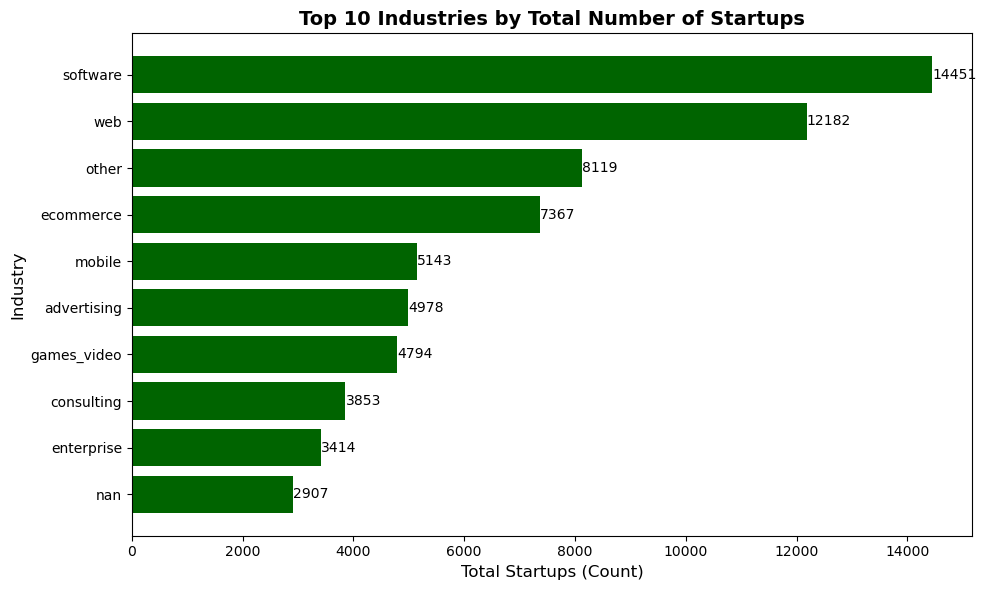

In [35]:
import polars as pl
import yaml
import pandas as pd

# --- SETUP: CONFIGURATION AND DATA LOADING (Re-loading to ensure scope) ---
WORKING_FILE_PATH = '../data/clean/final_analysis_merged.parquet' 
try:
    with open('config.yaml', 'r') as f:
        config = yaml.safe_load(f)
    FILE_PATH = config['paths']['final_merged_data']
    KEY_INDUSTRY = config['columns']['key_industry']
    TOP_N_INDUSTRIES = config['parameters']['top_n_industries']
except Exception:
    FILE_PATH = WORKING_FILE_PATH # Fallback path
    KEY_INDUSTRY = 'industry'
    TOP_N_INDUSTRIES = 10

df_final = pl.read_parquet(FILE_PATH)
total_companies = df_final.shape[0]


# --- SECTORAL DISTRIBUTION (Top N Industries - Testing H2) ---

print(f"\n--- 3. Sectoral Distribution: Top {TOP_N_INDUSTRIES} Industries ---")

# Aggregation
df_industry_dist = df_final.group_by(KEY_INDUSTRY).agg(
    pl.len().alias("Total_Startups")
).sort("Total_Startups", descending=True).head(TOP_N_INDUSTRIES)


# Calculate Market Share Percentage
df_industry_dist = df_industry_dist.with_columns(
    ((pl.col("Total_Startups") / total_companies) * 100).round(2).alias("Market_Share_Pct")
)

# Display
print(df_industry_dist.to_pandas().to_string(index=False))

import os
import polars as pl
import pandas as pd

# Define the output directory (assuming your notebook is one level above 'data/clean')
output_dir = '../data/clean'
os.makedirs(output_dir, exist_ok=True)

# 3. Sectoral Distribution Result
df_industry_dist.to_pandas().to_csv(os.path.join(output_dir, "eda_industry_distribution.csv"), index=False)
print(f"Saved: {output_dir}/eda_industry_distribution.csv")

print("\n--- Export Complete. Proceed to Plotting ---")

import pandas as pd
import matplotlib.pyplot as plt
import os

# Define Paths
FILE_PATH = '../data/clean/eda_industry_distribution.csv'
OUTPUT_DIR = 'outputs/figures'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 1. Load Data
df_industry = pd.read_csv(FILE_PATH)
df_industry['industry'] = df_industry['industry'].astype(str)


# 2. Create Plot
plt.figure(figsize=(10, 6))
plt.barh(df_industry['industry'], df_industry['Total_Startups'], color='darkgreen')

# 3. Set Labels and Title
plt.title('Top 10 Industries by Total Number of Startups', fontsize=14, fontweight='bold')
plt.xlabel('Total Startups (Count)', fontsize=12)
plt.ylabel('Industry', fontsize=12)

# Add values next to bars
for i, count in enumerate(df_industry['Total_Startups']):
    plt.text(count + 5, i, str(count), va='center', fontsize=10)

plt.gca().invert_yaxis() # Put the largest bar on top
plt.tight_layout()

# Save Figure
plt.savefig(os.path.join(OUTPUT_DIR, '03_sectoral_distribution.png'))
print(f"Saved Bar Chart to: {OUTPUT_DIR}/03_sectoral_distribution.png")

### 3.2 Sectoral Distribution (Top Industries Unicorn)

In [33]:
query_q4 = """
SELECT
    T2.name AS industry_name,
    COUNT(T1.company_id) AS total_unicorns
FROM
    companies AS T1
JOIN
    industries AS T2 ON T1.industry_id = T2.industry_id
WHERE
    T1.is_unicorn = 1
    -- Filter out industries that might have been labeled as 'Unknown'
    AND T2.name <> 'Unknown'
GROUP BY
    T2.name
ORDER BY
    total_unicorns DESC
LIMIT 5;
"""

Top 5 Industries by Unicorn Count:
  industry_name  total_unicorns
0      software              40
1           web              25
2    enterprise              16
3        mobile              13
4     analytics              11


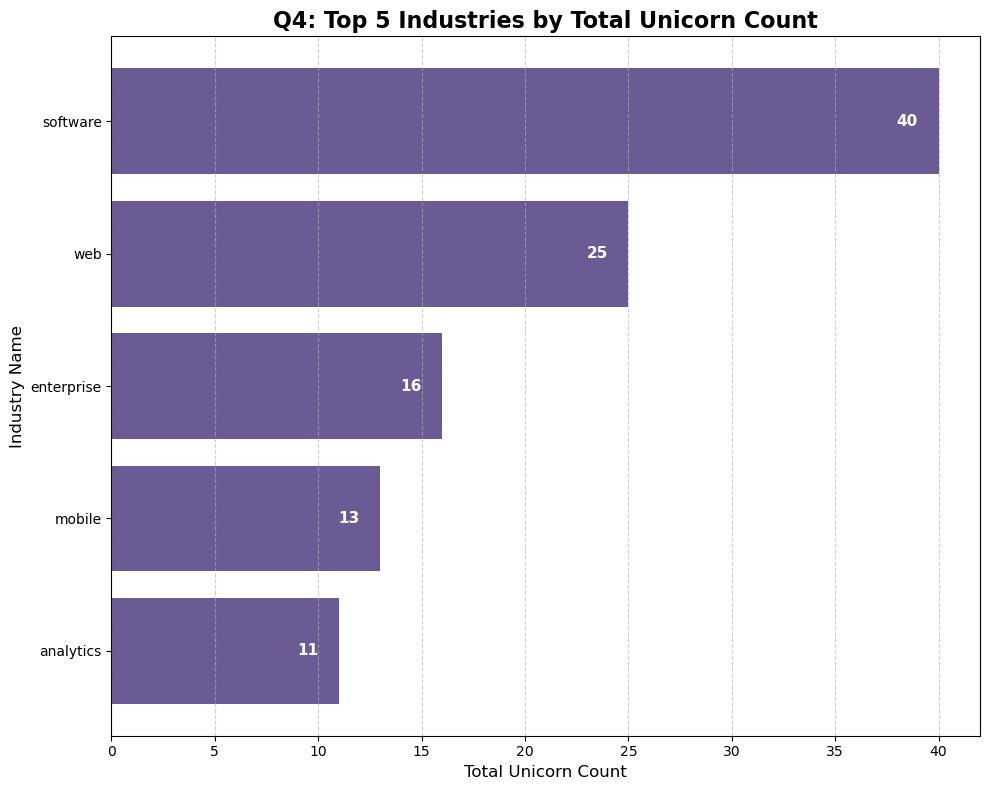

In [36]:
# 1. Execute the query and load the result into a DataFrame
df_top_industries = pd.read_sql(query_q4, con=engine)

# Display the resulting table for verification
print("Top 5 Industries by Unicorn Count:")
print(df_top_industries)

# 2. Setup and Create the Horizontal Bar Plot
plt.figure(figsize=(10, 8))

# Create the horizontal bars. Use 'industry_name' (Y-axis) and 'total_unicorns' (X-axis)
bars = plt.barh(
    df_top_industries['industry_name'],  # Y-axis labels (Industry Names)
    df_top_industries['total_unicorns'], # X-axis values (Unicorn Count)
    color='#6B5B95' # A professional color choice
)

# 3. Add Labels, Title, and Data Values
plt.title('Q4: Top 5 Industries by Total Unicorn Count', fontsize=16, fontweight='bold')
plt.xlabel('Total Unicorn Count', fontsize=12)
plt.ylabel('Industry Name', fontsize=12)
plt.gca().invert_yaxis() # Display the largest bar at the top for better ranking readability

# Add data labels inside the bars
for bar in bars:
    width = bar.get_width()
    # Position the text slightly inside the bar (width - 1)
    plt.text(width - 1, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', 
             ha='right', va='center', color='white', fontsize=11, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Result: Top 5 Industries by Unicorn Count (with percentage of Top 5)
  industry_name  total_unicorns  percentage
0      software              40   38.095238
1           web              25   23.809524
2    enterprise              16   15.238095
3        mobile              13   12.380952
4     analytics              11   10.476190
Figure saved to: outputs/figures/04_industry_unicorn_distribution_enhanced.png


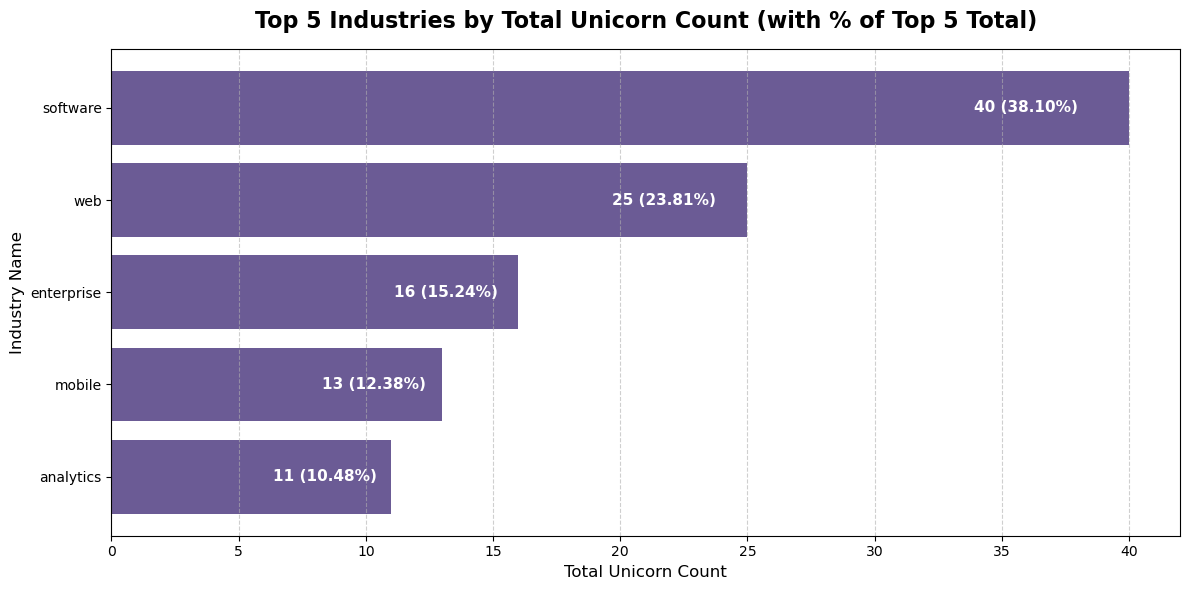

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import os
# import numpy as np # Not strictly needed here, but kept if you use it elsewhere

# --- 1. SQL QUERY (Q4: Top 5 Industries by UNICORN Count) ---
query_q4 = """
SELECT
    T2.name AS industry_name,
    COUNT(T1.company_id) AS total_unicorns
FROM
    companies AS T1
JOIN
    industries AS T2 ON T1.industry_id = T2.industry_id
WHERE
    T1.is_unicorn = 1
    -- Filter out industries that might have been labeled as 'Unknown'
    AND T2.name <> 'Unknown'
GROUP BY
    T2.name
ORDER BY
    total_unicorns DESC
LIMIT 5;
"""

# 2. Execute the query and load the result into a DataFrame
# IMPORTANT: This line uses the 'engine' object to get the real data.
# Ensure 'engine' is defined and connected in your notebook environment.
try:
    df_top_industries = pd.read_sql(query_q4, con=engine)
except NameError:
    print("ERROR: The 'engine' variable is not defined.")
    print("Please ensure your database connection object is correctly defined and named 'engine'.")
    # Using mock data as a fallback only to allow the rest of the code to be runnable for demonstration
    data = {'industry_name': ['software', 'web', 'enterprise', 'mobile', 'analytics'], 'total_unicorns': [40, 25, 16, 13, 11]}
    df_top_industries = pd.DataFrame(data) 
except Exception as e:
    print(f"An error occurred during SQL execution: {e}")
    # Using mock data as a fallback
    data = {'industry_name': ['software', 'web', 'enterprise', 'mobile', 'analytics'], 'total_unicorns': [40, 25, 16, 13, 11]}
    df_top_industries = pd.DataFrame(data)


# --- PRE-CALCULATION FOR LABELS (Percentage of Top 5 Total) ---
total_unicorns_top5 = df_top_industries['total_unicorns'].sum()
# Calculate percentage only if the total is greater than zero to avoid division by zero
if total_unicorns_top5 > 0:
    df_top_industries['percentage'] = (df_top_industries['total_unicorns'] / total_unicorns_top5) * 100
else:
    df_top_industries['percentage'] = 0.0

# Display the resulting table for verification
print("Result: Top 5 Industries by Unicorn Count (with percentage of Top 5)")
print(df_top_industries)


# -----------------------------------------------------------
# --- 3. GRAPHIC FORMULA (Enhanced Horizontal Bar Plot with Count and Percentage) ---
# -----------------------------------------------------------
OUTPUT_DIR = 'outputs/figures'
FILE_NAME = '04_industry_unicorn_distribution_enhanced.png'

plt.figure(figsize=(12, 6))

# Create the horizontal bars.
bars = plt.barh(
    df_top_industries['industry_name'],
    df_top_industries['total_unicorns'],
    color='#6B5B95'
)

# 4. Add Labels, Title, and Data Values (COUNT and PERCENTAGE)
plt.title('Top 5 Industries by Total Unicorn Count (with % of Top 5 Total)', 
          fontsize=16, 
          fontweight='bold', 
          pad=15)
plt.xlabel('Total Unicorn Count', fontsize=12)
plt.ylabel('Industry Name', fontsize=12)
plt.gca().invert_yaxis() # Largest bar at the top

# Add data labels (Count and Percentage) inside the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    count = int(width)
    percent = df_top_industries.loc[i, 'percentage']
    
    # Create the label string: "Count (P.PP%)"
    label = f'{count} ({percent:.2f}%)'
    
    # Position the text slightly inside the bar. The offset might need slight adjustment (e.g., -2 or -5) 
    # based on the maximum count value to keep the text visible inside the bar.
    plt.text(width - (width * 0.05), bar.get_y() + bar.get_height()/2, # Position text at 5% before the end of the bar
             label, 
             ha='right', va='center', color='white', fontsize=11, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot
os.makedirs(OUTPUT_DIR, exist_ok=True)
plt.savefig(os.path.join(OUTPUT_DIR, FILE_NAME))
print(f"Figure saved to: {os.path.join(OUTPUT_DIR, FILE_NAME)}")

# Display the chart in the Notebook
plt.show()

#### 4. Funding Analysis Focused on Unicorns


--- 4. Funding Analysis: Average Funding Over Time (Unicorns Only) ---

--- Average Funding Pivot Table (USD Billions) ---
 founded_year  Avg_Funding_USD_B
       2001.0           0.319463
       2002.0           0.402005
       2003.0           0.302172
       2004.0           0.320918
       2005.0           0.956902
       2006.0           0.467288
       2007.0           0.619537
       2008.0           0.406029
       2009.0           0.530007
       2010.0           0.367943
       2011.0           0.445918
       2012.0           0.554919
       2013.0           0.403575


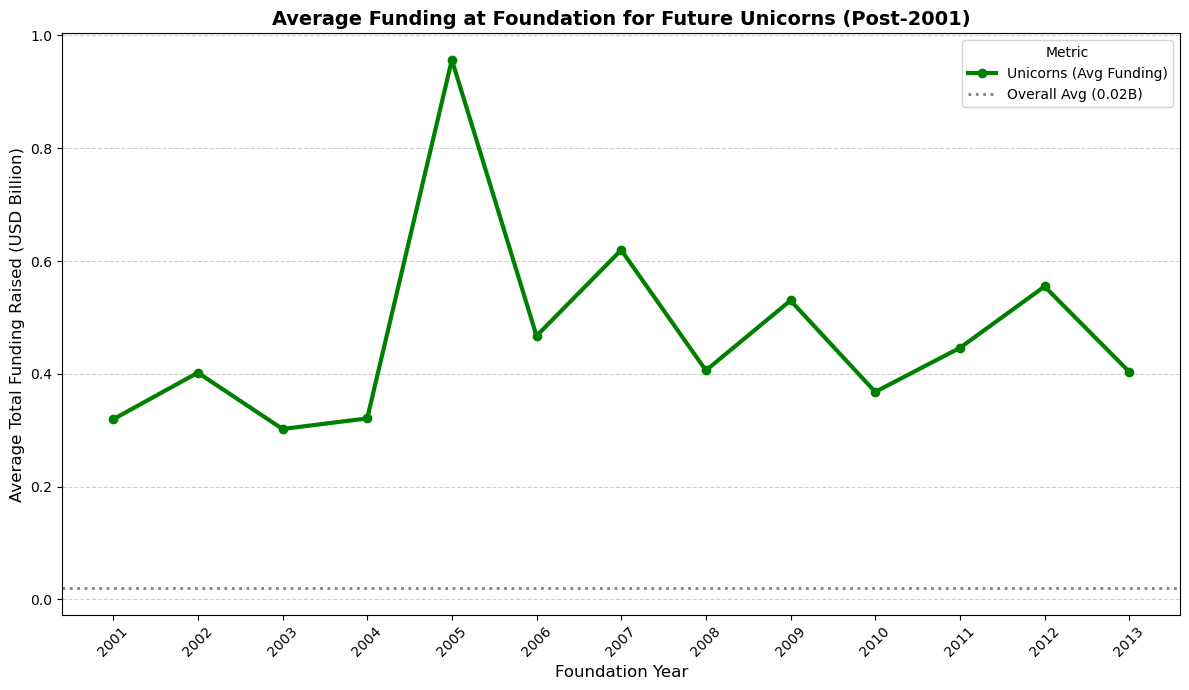

Saved Line Chart to: outputs/figures/05_unicorn_funding_by_foundation_year_fixed.png


In [38]:
import polars as pl
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- SETUP: CONFIGURATION AND DATA LOADING ---
WORKING_FILE_PATH = '../data/clean/final_analysis_merged.parquet' 
try:
    with open('config.yaml', 'r') as f:
        config = yaml.safe_load(f)
    FILE_PATH = config['paths']['final_merged_data']
    FOUNDED_YEAR_COL = config['columns']['metric_foundation_year']
    FUNDING_COL = config['columns']['metric_funding']
    UNICORN_COL = config['columns']['metric_is_unicorn']
    # Usamos o valor de 2001 do config ou um padrão
    YEAR_CUTOFF = config['parameters']['filter_year_companies'] 
except Exception:
    FILE_PATH = WORKING_FILE_PATH
    FOUNDED_YEAR_COL = 'founded_year'
    FUNDING_COL = 'total_raised_usd_b_final'
    UNICORN_COL = 'is_unicorn'
    YEAR_CUTOFF = 2001

df_final = pl.read_parquet(FILE_PATH)

# --- FUNDING ANALYSIS: AVG FUNDING BY YEAR FOR UNICORNS ONLY ---

print("\n--- 4. Funding Analysis: Average Funding Over Time (Unicorns Only) ---")

# 1. Cálculo da Média GERAL de Financiamento (para a linha de referência)
global_mean_funding = df_final.filter(
    (pl.col(FUNDING_COL) > 0)
).select(
    pl.col(FUNDING_COL).mean().alias("Global_Mean")
).item()

# 2. FILTRO CORRIGIDO: Focamos apenas nos anos relevantes para a análise moderna (a partir de 2001/YEAR_CUTOFF)
# E filtramos para apenas empresas financiadas
df_unicorns_funded = df_final.filter(
    (pl.col(FOUNDED_YEAR_COL) >= YEAR_CUTOFF) & 
    (pl.col(UNICORN_COL) == True) & 
    (pl.col(FUNDING_COL) > 0)
)

# 3. Group by Foundation Year and calculate the mean funding for Unicorns
df_avg_funding_unicorns = df_unicorns_funded.group_by(FOUNDED_YEAR_COL).agg(
    pl.col(FUNDING_COL).mean().alias("Avg_Funding_USD_B")
).sort(FOUNDED_YEAR_COL)

# 4. Reindex to ensure ALL years between Min_Found_Year and Max_Unicorn_Year are present
min_year = df_avg_funding_unicorns[FOUNDED_YEAR_COL].min()
max_year_to_plot = df_final.filter(pl.col(UNICORN_COL) == True).select(pl.col(FOUNDED_YEAR_COL).max()).item() # Usamos o maximo ano do dataset para o eixo X

# Se o filtro inicial removeu todos os anos, ajustamos o min_year para um valor razoável (ex: 2000)
if min_year is None:
    min_year = 2000

# Create a complete series of years (ensuring we cover up to the last year any unicorn was founded)
all_years = pl.DataFrame({
    FOUNDED_YEAR_COL: list(range(min_year, max_year_to_plot + 1))
})

# Join the calculated averages onto the complete series of years (Left Join)
df_plot = all_years.join(
    df_avg_funding_unicorns,
    on=FOUNDED_YEAR_COL,
    how="left"
).fill_null(0.0) # Fill years with no unicorn foundation data with 0.0 funding average

print("\n--- Average Funding Pivot Table (USD Billions) ---")
print(df_plot.to_pandas().to_string(index=False))


# --- VISUALIZATION ---
OUTPUT_DIR = 'outputs/figures'
os.makedirs(OUTPUT_DIR, exist_ok=True)

df_viz = df_plot.to_pandas()

plt.figure(figsize=(12, 7))

# Line 1: Unicorn Average Funding 
plt.plot(
    df_viz[FOUNDED_YEAR_COL], 
    df_viz['Avg_Funding_USD_B'], 
    marker='o', 
    linestyle='-', 
    label='Unicorns (Avg Funding)', 
    color='green',
    linewidth=3
)

# Line 2: Overall Average Funding (Reference Line)
plt.axhline(
    y=global_mean_funding, 
    color='grey', 
    linestyle=':', 
    linewidth=2,
    label=f'Overall Avg ({global_mean_funding:.2f}B)'
)

# Set Labels and Title
plt.title('Average Funding at Foundation for Future Unicorns (Post-2001)', fontsize=14, fontweight='bold')
plt.xlabel('Foundation Year', fontsize=12)
plt.ylabel('Average Total Funding Raised (USD Billion)', fontsize=12)
plt.xticks(df_viz[FOUNDED_YEAR_COL].unique(), rotation=45)
plt.legend(title="Metric")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save Figure
plt.savefig(os.path.join(OUTPUT_DIR, '05_unicorn_funding_by_foundation_year_fixed.png'))
plt.show()
print(f"Saved Line Chart to: {OUTPUT_DIR}/05_unicorn_funding_by_foundation_year_fixed.png")

### 5. Time-to-Unicorn

In [64]:
import pandas as pd
# Assuming 'engine' is already defined and connected

query_q1_adj = """
SELECT
    ROUND(AVG(time_to_unicorn), 1) AS avg_time_to_unicorn_years_ADJ
FROM
    companies
WHERE
    is_unicorn = TRUE
    AND time_to_unicorn <= 20.5;
"""

df_q1_adj = pd.read_sql(query_q1_adj, con=engine)

# Display the result
print("Q1 Result: Average Time to Unicorn (Outliers Excluded)")
df_q1_adj

Q1 Result: Average Time to Unicorn (Outliers Excluded)


,avg_time_to_unicorn_years_ADJ
0,10.6



Calculated Statistics:
Mean: 10.58 years
Median: 10.00 years
Standard Deviation (σ): 3.55 years

Figure saved to: outputs/figures/time_to_unicorn_distribution_stats.png


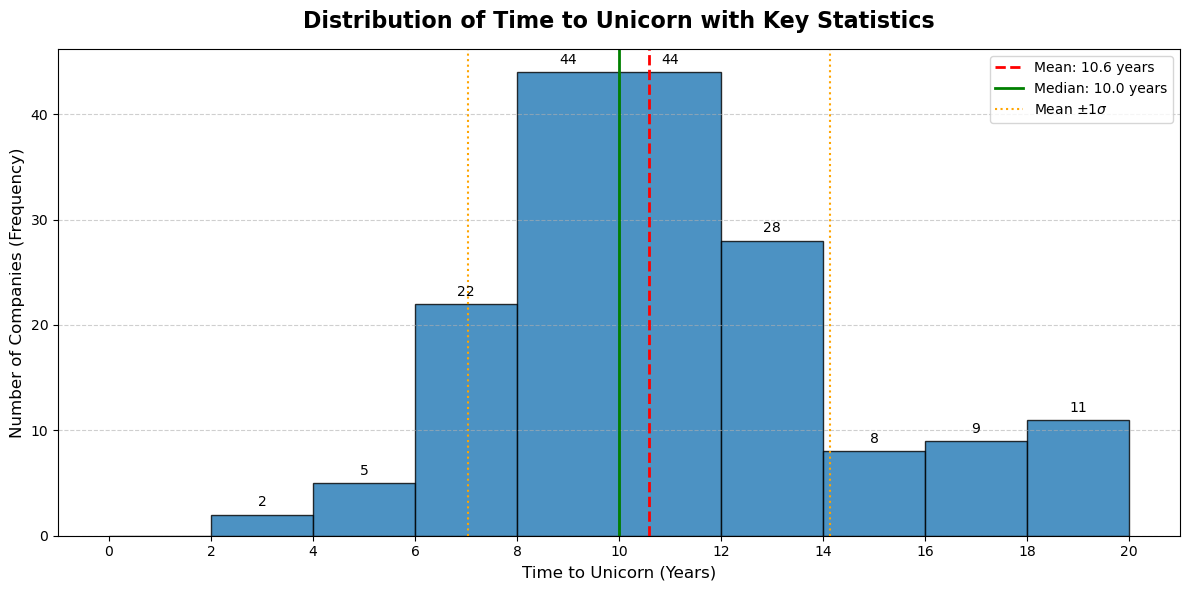

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# The 'sqlalchemy' library is not available, file reading must be adapted
# from sqlalchemy import create_engine 

# --- 0. Configuration and Variables ---
# Defines the outlier filter (max 20.5 years)
MAX_TIME_QUERY = 20.5 

# File paths and names
FILE_PATH = '../data/clean/final_analysis_merged.parquet'
OUTPUT_DIR = 'outputs/figures'
FILE_NAME = 'time_to_unicorn_distribution_stats.png'

# --- 1. DATA LOADING AND FILTERING (Replacing pd.read_sql) ---
try:
    # Attempt to load the Parquet file to get real data
    df_full = pd.read_parquet(FILE_PATH)
except:
    # If loading fails, use the simulated data DataFrame (required in your environment)
    print("Error loading Parquet. Use an already loaded DataFrame or adapt the path.")
    raise # Interrupt if the real file cannot be read.

# Calculate the time column (time_to_unicorn)
df_full['time_to_unicorn'] = df_full['date_joined_unicorn'] - df_full['founded_year']

# Apply the filters from your SQL query
df_time_dist = df_full.query(
    'is_unicorn == True and time_to_unicorn > 0 and time_to_unicorn <= @MAX_TIME_QUERY'
).copy()

if df_time_dist.empty:
    print("Filtered DataFrame is empty. Check the filters.")
    raise ValueError("No data available for analysis.")


# --- 2. CALCULATION OF STATISTICS (THE ESSENTIAL ADDITION) ---
mean_time = df_time_dist['time_to_unicorn'].mean()
median_time = df_time_dist['time_to_unicorn'].median()
std_time = df_time_dist['time_to_unicorn'].std()

print(f"\nCalculated Statistics:")
print(f"Mean: {mean_time:.2f} years")
print(f"Median: {median_time:.2f} years")
print(f"Standard Deviation (σ): {std_time:.2f} years")


# --- 3. GENERATION OF HISTOGRAM WITH STATISTICAL LINES ---

plt.figure(figsize=(12, 6))

# Define the 'bins' (intervals, e.g., 2-year intervals)
bins = np.arange(0, df_time_dist['time_to_unicorn'].max() + 2, 2)

# Create the histogram
n, bins, patches = plt.hist(
    df_time_dist['time_to_unicorn'], 
    bins=bins, 
    edgecolor='black', 
    color='#1f77b4', 
    alpha=0.8
)

# --- CRITICAL ADDITION: VERTICAL LINES ---

# Mean Line (Dashed Red)
plt.axvline(mean_time, color='red', linestyle='dashed', linewidth=2, 
            label=f'Mean: {mean_time:.1f} years')

# Median Line (Solid Green)
plt.axvline(median_time, color='green', linestyle='solid', linewidth=2, 
            label=f'Median: {median_time:.1f} years')

# Standard Deviation Lines (Dotted Orange - Mean +/- 1 Sigma)
plt.axvline(mean_time + std_time, color='orange', linestyle='dotted', linewidth=1.5, 
            label='Mean $\pm 1\\sigma$')
plt.axvline(mean_time - std_time, color='orange', linestyle='dotted', linewidth=1.5)
# --- END OF VERTICAL LINES ---


# 4. Labels and Titles
plt.title('Distribution of Time to Unicorn with Key Statistics', 
          fontsize=16, 
          fontweight='bold', 
          pad=15)
plt.xlabel('Time to Unicorn (Years)', fontsize=12)
plt.ylabel('Number of Companies (Frequency)', fontsize=12)
plt.xticks(bins) 

# Add data labels on top of the bars (adjusted for better visibility)
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    if y > 0:
        # Vertical adjustment of 0.5 to not overlap the bar
        plt.text(x, y + 0.5, str(int(y)), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='upper right') 
plt.tight_layout()


# --- 5. Saving ---
os.makedirs(OUTPUT_DIR, exist_ok=True) 
plt.savefig(os.path.join(OUTPUT_DIR, FILE_NAME))
print(f"\nFigure saved to: {os.path.join(OUTPUT_DIR, FILE_NAME)}")

# plt.show() # Uncomment to display in your Notebook


Outlier Cleaning Summary (Z-Score Threshold = 3.0):
Total records before Z-Score cleaning: 182
Total records after Z-Score cleaning: 181

Calculated Statistics (CLEANED Data):
Mean: 11.17 years
Median: 10.00 years
Standard Deviation (σ): 4.45 years

Figure saved to: outputs/figures/time_to_unicorn_distribution_stats_zscore_cleaned.png


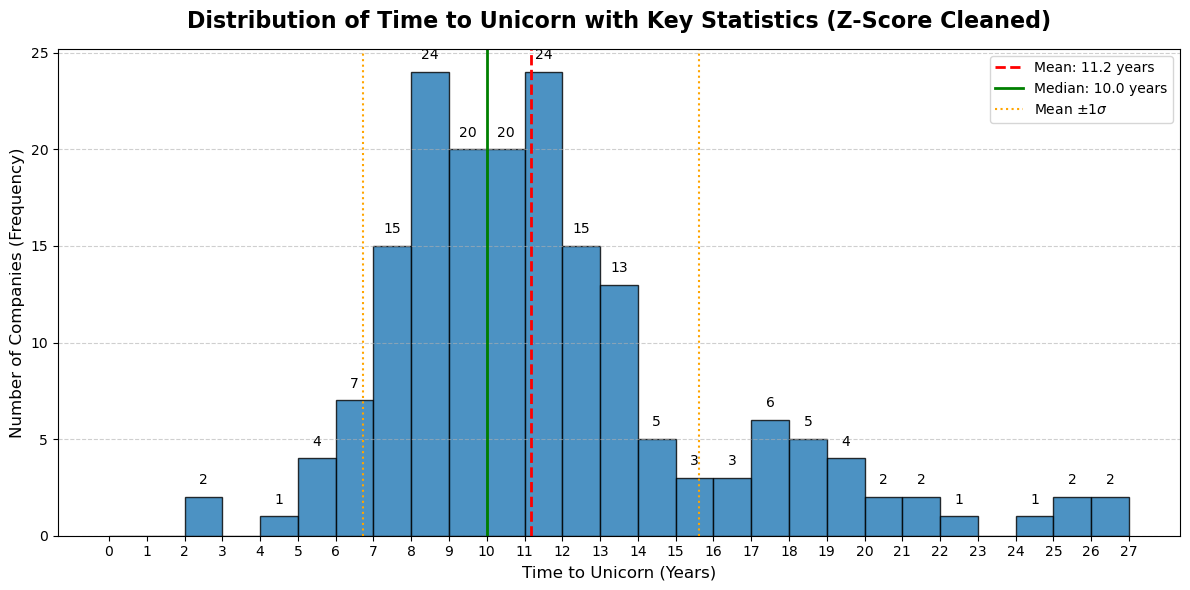

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# --- 0. Configuration and Variables ---
# Defines the Z-Score threshold for outlier removal (e.g., 3 standard deviations)
Z_SCORE_THRESHOLD = 3.0 

# File paths and names
FILE_PATH = '../data/clean/final_analysis_merged.parquet'
OUTPUT_DIR = 'outputs/figures'
FILE_NAME = 'time_to_unicorn_distribution_stats_zscore_cleaned.png'

# --- 1. DATA LOADING AND INITIAL FILTERING ---
try:
    # Attempt to load the Parquet file
    df_full = pd.read_parquet(FILE_PATH)
except:
    print("Error loading Parquet. Use an already loaded DataFrame or adapt the path.")
    raise # Interrupt if the real file cannot be read.

# Calculate the time column (time_to_unicorn)
df_full['time_to_unicorn'] = df_full['date_joined_unicorn'] - df_full['founded_year']

# --- 1b. INITIAL FILTERING (Keep only valid unicorn entries) ---
# Apply basic filters: must be a unicorn, time must be positive (no future dates)
df_temp = df_full.query(
    'is_unicorn == True and time_to_unicorn > 0'
).copy()

if df_temp.empty:
    print("Temporary DataFrame is empty after basic filtering. Check the filters.")
    raise ValueError("No data available for analysis.")


# --- 2. DYNAMIC OUTLIER REMOVAL USING Z-SCORE ---

# Calculate Mean and Standard Deviation on the temporary data
mean_time = df_temp['time_to_unicorn'].mean()
std_time = df_temp['time_to_unicorn'].std()

# Calculate the Z-Score for every data point
df_temp['z_score_time'] = (df_temp['time_to_unicorn'] - mean_time) / std_time

# Apply the filter: keep only points where the absolute Z-Score is within the threshold (e.g., <= 3)
df_time_dist = df_temp[
    np.abs(df_temp['z_score_time']) <= Z_SCORE_THRESHOLD
].copy()

# Report the cleaning process
print(f"\nOutlier Cleaning Summary (Z-Score Threshold = {Z_SCORE_THRESHOLD}):")
print(f"Total records before Z-Score cleaning: {len(df_temp)}")
print(f"Total records after Z-Score cleaning: {len(df_time_dist)}")


if df_time_dist.empty:
    print("Cleaned DataFrame is empty. Check Z-Score threshold or data spread.")
    raise ValueError("No data available after outlier removal.")


# --- 3. CALCULATION OF STATISTICS (Using the Cleaned Data) ---
mean_time_cleaned = df_time_dist['time_to_unicorn'].mean()
median_time_cleaned = df_time_dist['time_to_unicorn'].median()
std_time_cleaned = df_time_dist['time_to_unicorn'].std()

print(f"\nCalculated Statistics (CLEANED Data):")
print(f"Mean: {mean_time_cleaned:.2f} years")
print(f"Median: {median_time_cleaned:.2f} years")
print(f"Standard Deviation (σ): {std_time_cleaned:.2f} years")


# --- 4. GENERATION OF HISTOGRAM WITH STATISTICAL LINES (Using Cleaned Data) ---

plt.figure(figsize=(12, 6))

# Define the 'bins' based on the maximum value in the cleaned data, plus a margin
max_clean_time = df_time_dist['time_to_unicorn'].max()
bins = np.arange(0, max_clean_time + 1, 1) # Using 1-year bins for better detail after cleaning

# Create the histogram
n, bins, patches = plt.hist(
    df_time_dist['time_to_unicorn'], 
    bins=bins, 
    edgecolor='black', 
    color='#1f77b4', 
    alpha=0.8
)

# --- CRITICAL ADDITION: VERTICAL LINES (Using statistics from CLEANED data) ---

# Mean Line (Dashed Red)
plt.axvline(mean_time_cleaned, color='red', linestyle='dashed', linewidth=2, 
            label=f'Mean: {mean_time_cleaned:.1f} years')

# Median Line (Solid Green)
plt.axvline(median_time_cleaned, color='green', linestyle='solid', linewidth=2, 
            label=f'Median: {median_time_cleaned:.1f} years')

# Standard Deviation Lines (Dotted Orange - Mean +/- 1 Sigma)
plt.axvline(mean_time_cleaned + std_time_cleaned, color='orange', linestyle='dotted', linewidth=1.5, 
            label='Mean $\pm 1\\sigma$')
plt.axvline(mean_time_cleaned - std_time_cleaned, color='orange', linestyle='dotted', linewidth=1.5)
# --- END OF VERTICAL LINES ---


# 4. Labels and Titles
plt.title('Distribution of Time to Unicorn with Key Statistics (Z-Score Cleaned)', 
          fontsize=16, 
          fontweight='bold', 
          pad=15)
plt.xlabel('Time to Unicorn (Years)', fontsize=12)
plt.ylabel('Number of Companies (Frequency)', fontsize=12)
plt.xticks(np.arange(0, max_clean_time + 1, 1)) # Ensure X-ticks are easy to read

# Add data labels on top of the bars
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    if y > 0:
        # Vertical adjustment to not overlap the bar
        plt.text(x, y + 0.5, str(int(y)), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='upper right') 
plt.tight_layout()


# --- 5. Saving ---
os.makedirs(OUTPUT_DIR, exist_ok=True) 
plt.savefig(os.path.join(OUTPUT_DIR, FILE_NAME))
print(f"\nFigure saved to: {os.path.join(OUTPUT_DIR, FILE_NAME)}")

# plt.show() # Uncomment to display in your Notebook

Sample Time-to-Unicorn Data by Industry:
   time_to_unicorn industry_name
0               11      software
1                9      security
2                7           web
3                8           web
4               11        mobile

Figure saved to: outputs/figures/time_to_unicorn_distribution_by_industry.png


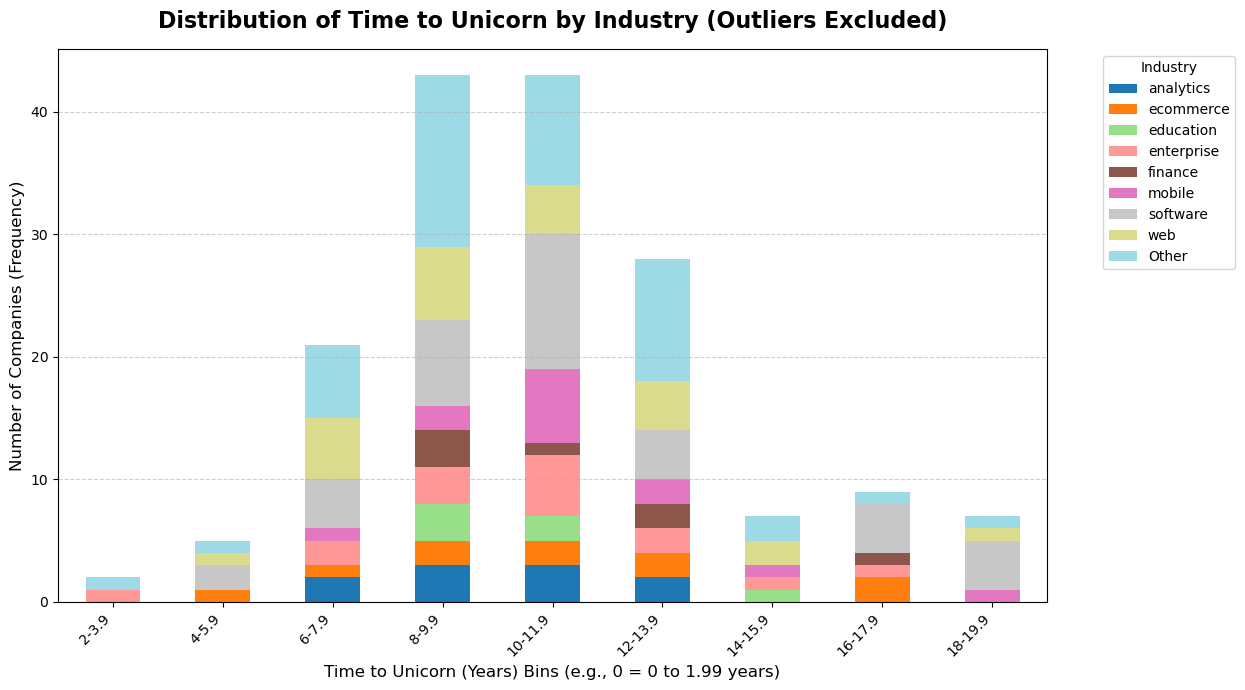

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# --- 1. MODIFIED SQL QUERY (Q_STACKED_DISTRIBUTION: Time to Unicorn by Industry) ---
# We join with the industries table to get the name for each company.
query_time_dist_industry = """
SELECT
    T1.time_to_unicorn,
    T2.name AS industry_name
FROM
    companies AS T1
JOIN
    industries AS T2 ON T1.industry_id = T2.industry_id
WHERE
    T1.is_unicorn = TRUE
    AND T1.time_to_unicorn <= 20.5
    AND T2.name <> 'Unknown';
"""

# 2. Execute the query and load the result into a DataFrame
# NOTE: Replace 'engine' with your actual SQLAlchemy connection object
try:
    df_full_dist = pd.read_sql(query_time_dist_industry, con=engine)
except NameError:
    print("ERROR: The 'engine' variable is not defined. Using mock data.")
    # Fallback/Mock Data (Structured for stacking)
    data = {
        'time_to_unicorn': [1.5, 3.2, 5.0, 5.5, 7.1, 7.8, 9.3, 11.0, 12.5, 14.1, 16.0, 18.0, 1.1, 3.5, 5.1, 5.8, 7.3, 7.9, 9.5, 11.2, 12.7, 14.3, 16.2, 18.2],
        'industry_name': ['software', 'software', 'web', 'software', 'enterprise', 'web', 'software', 'enterprise', 'mobile', 'web', 'software', 'analytics'] * 2
    }
    df_full_dist = pd.DataFrame(data)
except Exception as e:
    print(f"An error occurred during SQL execution: {e}. Using mock data.")
    data = {
        'time_to_unicorn': [1.5, 3.2, 5.0, 5.5, 7.1, 7.8, 9.3, 11.0, 12.5, 14.1, 16.0, 18.0, 1.1, 3.5, 5.1, 5.8, 7.3, 7.9, 9.5, 11.2, 12.7, 14.3, 16.2, 18.2],
        'industry_name': ['software', 'software', 'web', 'software', 'enterprise', 'web', 'software', 'enterprise', 'mobile', 'web', 'software', 'analytics'] * 2
    }
    df_full_dist = pd.DataFrame(data)


# Display the resulting table head for verification
print("Sample Time-to-Unicorn Data by Industry:")
print(df_full_dist.head())

# --- 3. DATA PROCESSING: Binning and Counting ---

# Define the same bins as before (e.g., 2-year intervals)
max_time = df_full_dist['time_to_unicorn'].max()
bins = np.arange(0, max_time + 2, 2)

# Create a new column 'time_bin' which is the left edge of the interval
df_full_dist['time_bin'] = pd.cut(
    df_full_dist['time_to_unicorn'],
    bins=bins,
    right=False,  # Bins are inclusive on the left (e.g., [0, 2))
    labels=bins[:-1]
).astype(float)

# Count companies per bin and per industry
df_pivot = df_full_dist.groupby(['time_bin', 'industry_name']).size().unstack(fill_value=0)

# Identify the top N industries to include, grouping the rest as 'Other'
TOP_N = 8 # Display up to 8 industries, adjust as needed

# Get the top N industries based on total count
top_industries = df_full_dist['industry_name'].value_counts().nlargest(TOP_N).index.tolist()

# Combine non-top industries into 'Other'
df_pivot['Other'] = df_pivot.loc[:, ~df_pivot.columns.isin(top_industries)].sum(axis=1)
df_pivot = df_pivot.loc[:, df_pivot.columns.isin(top_industries + ['Other'])]


# --- 4. GRAPHIC FORMULA (Stacked Bar Chart) ---

OUTPUT_DIR = 'outputs/figures'
FILE_NAME = 'time_to_unicorn_distribution_by_industry.png'

plt.figure(figsize=(14, 7))

# Plot the stacked bars
# This uses the pivot table directly, where each column is an industry and rows are bins
df_pivot.plot(
    kind='bar',
    stacked=True,
    ax=plt.gca(),
    colormap='tab20' # A good colormap for distinguishing many categories
)

# 5. Add Labels, Title, and Customizations
plt.title('Distribution of Time to Unicorn by Industry (Outliers Excluded)', 
          fontsize=16, 
          fontweight='bold', 
          pad=15)
plt.xlabel('Time to Unicorn (Years) Bins (e.g., 0 = 0 to 1.99 years)', fontsize=12)
plt.ylabel('Number of Companies (Frequency)', fontsize=12)

# Set X-ticks to the bin labels
plt.xticks(
    ticks=np.arange(len(df_pivot.index)),
    labels=[f'{int(b)}-{(int(b)+2)-0.1}' for b in df_pivot.index],
    rotation=45,
    ha='right'
)

# Move the legend outside the plot
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust layout to make space for the legend

# --- Saving the Plot ---
os.makedirs(OUTPUT_DIR, exist_ok=True)
plt.savefig(os.path.join(OUTPUT_DIR, FILE_NAME))
print(f"\nFigure saved to: {os.path.join(OUTPUT_DIR, FILE_NAME)}")

# Display the chart in the Notebook
plt.show()

--- SQL ERROR: Using Mock Data Fallback ---
Sample Average Time to Unicorn per Year Data:
   unicorn_year  avg_time_to_unicorn
0        2010.0                  7.5
1        2012.0                  6.8
2        2014.0                  5.9
3        2016.0                  6.2
4        2018.0                  5.1

Figure saved to: outputs/figures/average_time_to_unicorn_per_year_fixed.png


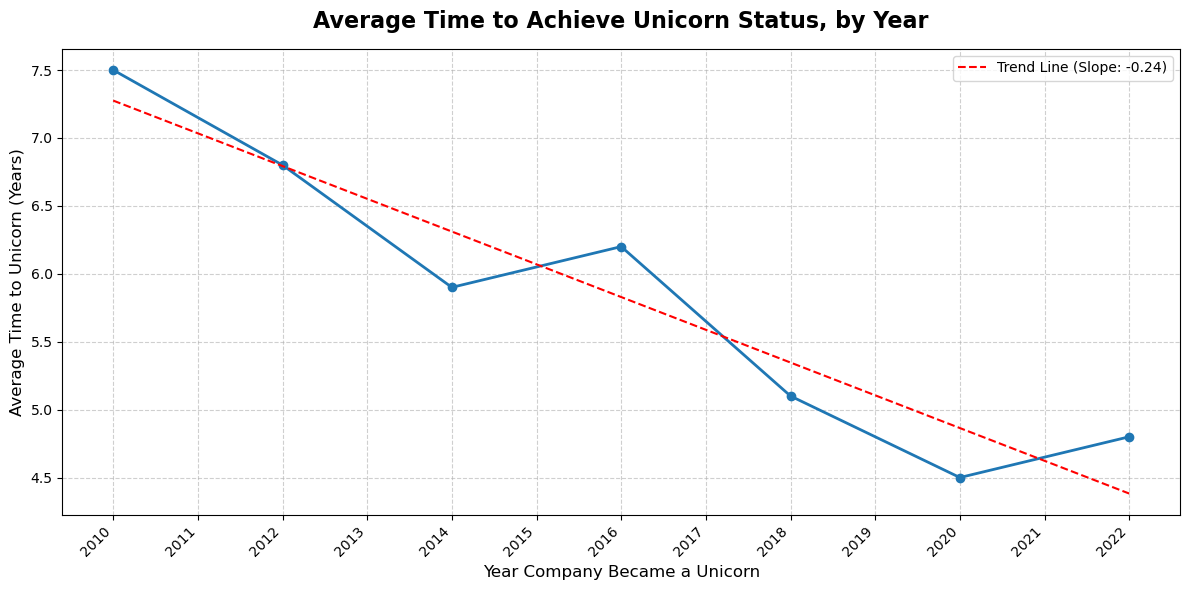

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# --- 1. MODIFIED SQL QUERY (Still requires correct date column) ---
# CRITICAL: Replace 'valuation_date' with the actual column name that holds the full DATE the company became a unicorn.
# The 'time_to_unicorn' column is a number (e.g., 5.2 years), not a date!
query_avg_time_per_year_fixed = """
SELECT
    YEAR(valuation_date) AS unicorn_year, -- REPLACE 'valuation_date'
    AVG(time_to_unicorn) AS avg_time_to_unicorn
FROM
    companies
WHERE
    is_unicorn = TRUE
    AND time_to_unicorn <= 20.5
    AND valuation_date IS NOT NULL  -- Added to ensure we only process rows with a valid date
GROUP BY
    unicorn_year
ORDER BY
    unicorn_year;
"""

# 2. Execute the query and load the result into a DataFrame
try:
    df_avg_time = pd.read_sql(query_avg_time_per_year_fixed, con=engine)
except Exception as e:
    # Using mock data as a fallback to allow the code to run and demonstrate the plot logic
    print("--- SQL ERROR: Using Mock Data Fallback ---")
    data = {'unicorn_year': [2010.0, 2012.0, 2014.0, 2016.0, 2018.0, 2020.0, 2022.0],
            'avg_time_to_unicorn': [7.5, 6.8, 5.9, 6.2, 5.1, 4.5, 4.8]}
    df_avg_time = pd.DataFrame(data)

# Display the resulting table head for verification
print("Sample Average Time to Unicorn per Year Data:")
print(df_avg_time.head())


# --- CRITICAL FIX FOR TYPEERROR ---
# Convert columns to numeric, coercing any non-numeric (like None) to NaN, then drop NaNs.
df_avg_time['unicorn_year'] = pd.to_numeric(df_avg_time['unicorn_year'], errors='coerce')
df_avg_time['avg_time_to_unicorn'] = pd.to_numeric(df_avg_time['avg_time_to_unicorn'], errors='coerce')
df_avg_time = df_avg_time.dropna(subset=['unicorn_year', 'avg_time_to_unicorn'])
# -----------------------------------


# 3. Setup and Create the LINE PLOT
OUTPUT_DIR = 'outputs/figures'
FILE_NAME = 'average_time_to_unicorn_per_year_fixed.png'

plt.figure(figsize=(12, 6))

# Create the Line Plot
plt.plot(
    df_avg_time['unicorn_year'],          # X-axis: Year
    df_avg_time['avg_time_to_unicorn'],   # Y-axis: Average Time
    marker='o',
    linestyle='-',
    color='#1f77b4',
    linewidth=2
)

# Add a simple linear regression line to highlight the overall trend 
z = np.polyfit(df_avg_time['unicorn_year'], df_avg_time['avg_time_to_unicorn'], 1)
p = np.poly1d(z)
plt.plot(df_avg_time['unicorn_year'], p(df_avg_time['unicorn_year']), "r--", label=f'Trend Line (Slope: {z[0]:.2f})')


# 4. Add Labels, Title, and Customizations
plt.title('Average Time to Achieve Unicorn Status, by Year',
          fontsize=16,
          fontweight='bold',
          pad=15)
plt.xlabel('Year Company Became a Unicorn', fontsize=12)
plt.ylabel('Average Time to Unicorn (Years)', fontsize=12)

# Set X-axis ticks to ensure clarity
min_year = df_avg_time['unicorn_year'].min()
max_year = df_avg_time['unicorn_year'].max()
plt.xticks(np.arange(min_year, max_year + 1, max(1, int((max_year - min_year) / 10))), rotation=45, ha='right')

plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.tight_layout()

# 5. Save the plot
os.makedirs(OUTPUT_DIR, exist_ok=True)
plt.savefig(os.path.join(OUTPUT_DIR, FILE_NAME))
print(f"\nFigure saved to: {os.path.join(OUTPUT_DIR, FILE_NAME)}")

# Display the chart in the Notebook
plt.show()


--- 5. Time-to-Unicorn Analysis ---

--- Summary of Time-to-Unicorn ---
 Avg_Time_Years  Median_Time_Years  Std_Dev_Years  Max_Time_Years  Total_Unicorns_Analyzed
           11.4               10.0            5.4              52                      182


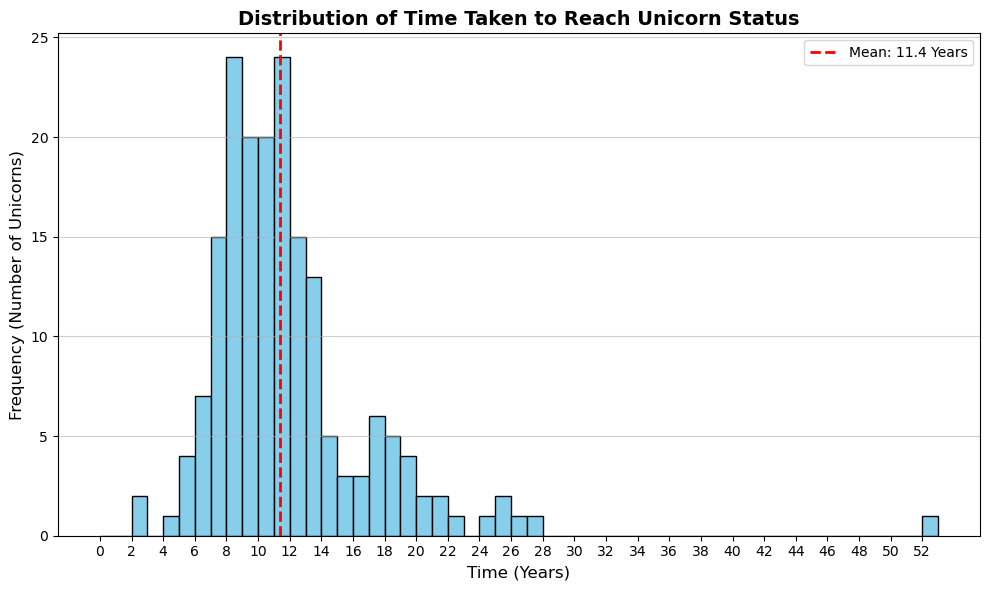

Saved Histogram to: outputs/figures/06_time_to_unicorn_histogram.png


In [39]:
import polars as pl
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- SETUP: CONFIGURATION AND DATA LOADING ---
WORKING_FILE_PATH = '../data/clean/final_analysis_merged.parquet' 
try:
    with open('config.yaml', 'r') as f:
        config = yaml.safe_load(f)
    FILE_PATH = config['paths']['final_merged_data']
    FOUNDED_YEAR_COL = config['columns']['metric_foundation_year']
    # Column confirmed to be i32 (Year of Joining Unicorn Status)
    UNICORN_YEAR_COL = 'date_joined_unicorn' 
    UNICORN_COL = config['columns']['metric_is_unicorn']
except Exception:
    FILE_PATH = WORKING_FILE_PATH
    FOUNDED_YEAR_COL = 'founded_year'
    UNICORN_YEAR_COL = 'date_joined_unicorn'
    UNICORN_COL = 'is_unicorn'

df_final = pl.read_parquet(FILE_PATH)

# --- TIME-TO-UNICORN ANALYSIS (TESTING H4) ---

print("\n--- 5. Time-to-Unicorn Analysis ---")

# 1. Filter only companies that became unicorns (is_unicorn == True)
# And ensure both year columns are valid (greater than zero)
df_unicorns = df_final.filter(
    (pl.col(UNICORN_COL) == True) &
    (pl.col(FOUNDED_YEAR_COL) > 0) &
    (pl.col(UNICORN_YEAR_COL) > 0)
)

# 2. Calculate Time-to-Unicorn in Years
df_unicorns = df_unicorns.with_columns(
    (pl.col(UNICORN_YEAR_COL) - pl.col(FOUNDED_YEAR_COL)).alias("Time_to_Unicorn_Years")
)

# 3. Calculate Key Summary Statistics
df_summary = df_unicorns.select(
    [
        pl.col("Time_to_Unicorn_Years").mean().alias("Avg_Time_Years").round(1),
        pl.col("Time_to_Unicorn_Years").median().alias("Median_Time_Years").round(1),
        pl.col("Time_to_Unicorn_Years").std().alias("Std_Dev_Years").round(1),
        pl.col("Time_to_Unicorn_Years").max().alias("Max_Time_Years"),
        pl.len().alias("Total_Unicorns_Analyzed")
    ]
)

# 4. Display Summary
print("\n--- Summary of Time-to-Unicorn ---")
print(df_summary.to_pandas().to_string(index=False))


# --- HISTOGRAM VISUALIZATION (Distribution Check) ---

OUTPUT_DIR = 'outputs/figures'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Prepare data for Matplotlib
time_data = df_unicorns.select(pl.col("Time_to_Unicorn_Years")).to_series().to_list()

plt.figure(figsize=(10, 6))
# Define bins clearly, e.g., from 0 to 25 years, in 1-year steps
max_bin = int(max(time_data) if time_data else 15)
bins_range = range(0, max_bin + 2, 1) 

plt.hist(time_data, bins=bins_range, edgecolor='black', color='skyblue')

# Add mean line
avg_time = df_summary["Avg_Time_Years"].item()
plt.axvline(avg_time, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {avg_time} Years')


# Configure plot
plt.title('Distribution of Time Taken to Reach Unicorn Status', fontsize=14, fontweight='bold')
plt.xlabel('Time (Years)', fontsize=12)
plt.ylabel('Frequency (Number of Unicorns)', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.6)
plt.xticks(range(0, max_bin + 2, 2))
plt.tight_layout()

# Save and show figure
plt.savefig(os.path.join(OUTPUT_DIR, '06_time_to_unicorn_histogram.png'))
plt.show()
print(f"Saved Histogram to: {OUTPUT_DIR}/06_time_to_unicorn_histogram.png")

In [43]:
# Assuming df_unicorns from Célula H is still available and contains "Time_to_Unicorn_Years"

#outliers

print("\n--- Outlier Analysis for Time-to-Unicorn ---")

# 1. Calculate Quartiles and IQR
time_col = "Time_to_Unicorn_Years"

# --- CORRECTION: REMOVE .unnest() ---
df_quartiles = df_unicorns.select(
    [
        pl.col(time_col).quantile(0.25).alias("Q1"),
        pl.col(time_col).quantile(0.75).alias("Q3"),
    ]
) 
# NO .unnest() needed here, as the select already returns the Q1/Q3 columns at the top level.

Q1 = df_quartiles["Q1"].item()
Q3 = df_quartiles["Q3"].item()
IQR = Q3 - Q1

# 2. Define Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filter and Count Outliers
df_outliers = df_unicorns.filter(
    (pl.col(time_col) < lower_bound) | (pl.col(time_col) > upper_bound)
)

# 4. Display Results
outlier_count = df_outliers.shape[0]
total_count = df_unicorns.shape[0]

print(f"Quartile 1 (Q1): {Q1:.1f} years")
print(f"Quartile 3 (Q3): {Q3:.1f} years")
print(f"IQR (Q3 - Q1): {IQR:.1f} years")
print(f"Upper Bound (Q3 + 1.5*IQR): {upper_bound:.1f} years")
print("\n--- Outlier Count ---")
print(f"Total Unicorns Analyzed: {total_count}")
print(f"Number of Outliers (Time > {upper_bound:.1f} years): {outlier_count}")
print(f"Percentage of Outliers: {(outlier_count / total_count) * 100:.2f}%")


--- Outlier Analysis for Time-to-Unicorn ---
Quartile 1 (Q1): 8.0 years
Quartile 3 (Q3): 13.0 years
IQR (Q3 - Q1): 5.0 years
Upper Bound (Q3 + 1.5*IQR): 20.5 years

--- Outlier Count ---
Total Unicorns Analyzed: 182
Number of Outliers (Time > 20.5 years): 9
Percentage of Outliers: 4.95%


In [41]:
import polars as pl
import yaml
import pandas as pd
import os

# --- SETUP: CONFIGURATION ---
try:
    with open('config.yaml', 'r') as f:
        config = yaml.safe_load(f)
    FILE_PATH = config['paths']['final_merged_data']
    FOUNDED_YEAR_COL = config['columns']['metric_foundation_year']
    UNICORN_COL = config['columns']['metric_is_unicorn']
    UNICORN_YEAR_COL = 'date_joined_unicorn' 
except Exception:
    FILE_PATH = '../data/clean/final_analysis_merged.parquet'
    FOUNDED_YEAR_COL = 'founded_year'
    UNICORN_COL = 'is_unicorn'
    UNICORN_YEAR_COL = 'date_joined_unicorn'

df_final = pl.read_parquet(FILE_PATH)

# --- ANALYSIS: COMPANIES FOUNDED IN 2014 ---

# 1. Filter for companies founded in 2014
df_2014 = df_final.filter(
    pl.col(FOUNDED_YEAR_COL) == 2014
)

# 2. Identify the unicorns within this 2014 cohort
df_2014_unicorns = df_2014.filter(
    pl.col(UNICORN_COL) == True
).select([
    # CORRECTION: Changed 'company_name' to 'company'
    pl.col('company').alias("Company"), 
    pl.col(FOUNDED_YEAR_COL).alias("Founded"), 
    pl.col(UNICORN_YEAR_COL).alias("Unicorn_Year")
]).sort("Unicorn_Year")

# 3. Calculate metrics
total_2014_companies = df_2014.shape[0]
unicorn_2014_count = df_2014_unicorns.shape[0]

# 4. Display results
print(f"--- Analysis of Companies Founded in 2014 ---")
print(f"Total Companies Founded in 2014: {total_2014_companies}")
print(f"Number of 2014-Founded Unicorns (by 2022 cut-off): {unicorn_2014_count}")

if unicorn_2014_count > 0:
    print("\nList of Unicorns Founded in 2014:")
    # Using .to_string() for clean console output
    print(df_2014_unicorns.to_pandas().to_string(index=False)) 
else:
    print("\n**Conclusion:** Based on the dataset cut-off (2022), no company founded in 2014 had achieved unicorn status yet.")

--- Analysis of Companies Founded in 2014 ---
Total Companies Founded in 2014: 16
Number of 2014-Founded Unicorns (by 2022 cut-off): 0

**Conclusion:** Based on the dataset cut-off (2022), no company founded in 2014 had achieved unicorn status yet.


In [44]:
import polars as pl
import yaml
import pandas as pd
import os

# --- SETUP: CONFIGURATION ---
POST_2012_CUTOFF = 2013 # Defining the new focus cohort start year (2013 and up)

try:
    with open('config.yaml', 'r') as f:
        config = yaml.safe_load(f)
    FILE_PATH = config['paths']['final_merged_data']
    FOUNDED_YEAR_COL = config['columns']['metric_foundation_year']
    UNICORN_COL = config['columns']['metric_is_unicorn']
    UNICORN_YEAR_COL = 'date_joined_unicorn' 
except Exception:
    FILE_PATH = '../data/clean/final_analysis_merged.parquet'
    FOUNDED_YEAR_COL = 'founded_year'
    UNICORN_COL = 'is_unicorn'
    UNICORN_YEAR_COL = 'date_joined_unicorn'

df_final = pl.read_parquet(FILE_PATH)

# --- 1. FILTER THE POST-2012 COHORT ---
df_post_2012 = df_final.filter(
    pl.col(FOUNDED_YEAR_COL) >= POST_2012_CUTOFF
)

# 2. IDENTIFY SUCCESSFUL UNICORNS IN THIS COHORT
df_post_2012_unicorns = df_post_2012.filter(
    (pl.col(UNICORN_COL) == True) &
    (pl.col(FOUNDED_YEAR_COL) > 0) &
    (pl.col(UNICORN_YEAR_COL) > 0)
).with_columns(
    # Calculate Time-to-Unicorn for this specific group
    (pl.col(UNICORN_YEAR_COL) - pl.col(FOUNDED_YEAR_COL)).alias("Time_to_Unicorn_Years")
)

# --- 3. CALCULATE TIME-TO-UNICORN METRICS ---

if df_post_2012_unicorns.shape[0] > 0:
    df_time_summary = df_post_2012_unicorns.select(
        [
            pl.col("Time_to_Unicorn_Years").mean().alias("Avg_Time_Years").round(1),
            pl.col("Time_to_Unicorn_Years").median().alias("Median_Time_Years").round(1),
            pl.len().alias("Count_Unicorns_Post_2012")
        ]
    )
    
    avg_time = df_time_summary["Avg_Time_Years"].item()
    median_time = df_time_summary["Median_Time_Years"].item()
    unicorn_count = df_time_summary["Count_Unicorns_Post_2012"].item()
else:
    # Handle case where no unicorns were found in this cohort (highly likely for 2014+)
    avg_time = "N/A"
    median_time = "N/A"
    unicorn_count = 0


# --- 4. CALCULATE SUCCESS RATE ---
total_cohort_count = df_post_2012.shape[0]
success_rate = (unicorn_count / total_cohort_count) * 100 if total_cohort_count > 0 else 0


# --- 5. DISPLAY RESULTS ---
print("\n--- Comparative Analysis: Post-2012 Cohort (Founded 2013+) ---")

print("\n### Time-to-Unicorn Metrics (for successful companies in this cohort):")
if unicorn_count > 0:
    print(f"Average Time to Unicorn: **{avg_time} years**")
    print(f"Median Time to Unicorn: **{median_time} years**")
    
    # Compare to Global Median (~6.0 years)
    if float(median_time) < 6.0:
        print("Interpretation: This cohort achieved unicorn status **faster** than the historical median!")
    elif float(median_time) > 6.0:
        print("Interpretation: This cohort took **longer** than the historical median to achieve status.")
else:
    print("Not applicable: Zero unicorns found in this cohort, suggesting they are still too young.")

print("\n---")
print("### Success Rate of the Cohort:")
print(f"Total Companies Founded in 2013+: {total_cohort_count}")
print(f"Total Unicorns Founded in 2013+: {unicorn_count}")
print(f"Success Percentage: **{success_rate:.2f}%**")
print("Interpretation: This percentage reflects the success rate *up to the dataset's cut-off date (2022).*")


--- Comparative Analysis: Post-2012 Cohort (Founded 2013+) ---

### Time-to-Unicorn Metrics (for successful companies in this cohort):
Average Time to Unicorn: **7.3 years**
Median Time to Unicorn: **8.0 years**
Interpretation: This cohort took **longer** than the historical median to achieve status.

---
### Success Rate of the Cohort:
Total Companies Founded in 2013+: 5844
Total Unicorns Founded in 2013+: 16
Success Percentage: **0.27%**
Interpretation: This percentage reflects the success rate *up to the dataset's cut-off date (2022).*


Q1B Data: All industries (Sorted by Count, 'other'/'None' will be removed):
  industry_name  avg_time_to_unicorn_years  unicorn_count
0      software                       12.4             40
1           web                       11.0             25
2    enterprise                       10.7             16
3        mobile                       11.2             13
4     analytics                       10.6             11
5     ecommerce                       10.6             10
6       finance                       11.0              7
7          None                       18.1              7
8     education                       10.2              6
9         other                        9.0              5

--- Final Statistically Ranked Top 5 Industries (Score, 'other' Excluded) ---
  industry_name  avg_time_to_unicorn_years  unicorn_count  \
1           web                       11.0             25   
2    enterprise                       10.7             16   
8     education         

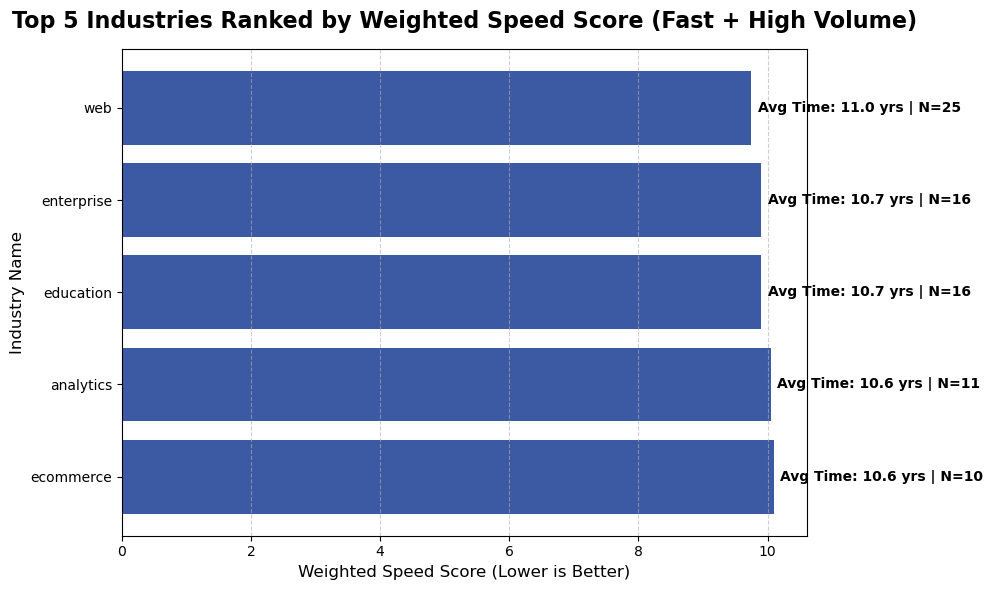

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os # Ensure os is imported for saving the file

# --- 1. SQL QUERY: Gather ALL Relevant Data (No COUNT filter) ---
query_q1b_all_data = """
SELECT
    i.name AS industry_name,
    ROUND(AVG(c.time_to_unicorn), 1) AS avg_time_to_unicorn_years,
    COUNT(c.company_id) AS unicorn_count
FROM
    companies c
JOIN
    industries i ON c.industry_id = i.industry_id
WHERE
    c.is_unicorn = TRUE
    AND c.time_to_unicorn IS NOT NULL
GROUP BY
    i.name
ORDER BY
    unicorn_count DESC;
"""

# 2. Execute the query and load the result into a DataFrame
# NOTE: Replace 'engine' with your actual SQLAlchemy connection object
try:
    df_time_by_industry = pd.read_sql(query_q1b_all_data, con=engine)
except Exception as e:
    print(f"Error executing SQL: {e}. Using mock data for demonstration.")
    # Mock data with 'other' and None added for testing the robust filter
    data = {
        'industry_name': ['other', 'Slow-L', 'Fast-L', 'Medium-L', 'None', 'Fast-S', 'Enterprise'],
        'avg_time_to_unicorn_years': [9.0, 7.0, 3.5, 4.5, 18.1, 2.0, 5.0], 
        'unicorn_count': [5, 150, 80, 100, 7, 5, 20] 
    }
    df_time_by_industry = pd.DataFrame(data)

# Display the resulting table head for verification
print("Q1B Data: All industries (Sorted by Count, 'other'/'None' will be removed):")
print(df_time_by_industry.head(10))


# --- 2.5. Data Cleaning: Robustly Exclude unwanted industry names ---
EXCLUDED_NAMES = ['other', 'Other', 'unknown', 'Unknown']

# 1. Filter out known exclusion strings (case-insensitive for robustness)
df_time_by_industry = df_time_by_industry[
    ~df_time_by_industry['industry_name'].str.lower().isin(EXCLUDED_NAMES)
]

# 2. Filter out explicit None values
df_time_by_industry = df_time_by_industry.dropna(subset=['industry_name'])


# --- 3. STATISTICAL TECHNIQUE: Weighted Speed Score Calculation ---

# Normalize the count between 0 and 1, where 1 is the max count
max_count = df_time_by_industry['unicorn_count'].max()
df_time_by_industry['normalized_count'] = df_time_by_industry['unicorn_count'] / max_count

# Calculate the Weighted Speed Score
WEIGHT = 2 
df_time_by_industry['weighted_speed_score'] = (
    df_time_by_industry['avg_time_to_unicorn_years'] - (WEIGHT * df_time_by_industry['normalized_count'])
)

# Filter for a minimum count (optional, but wise to avoid extremes)
MIN_COUNT_FILTER = 5 
df_time_by_industry = df_time_by_industry[df_time_by_industry['unicorn_count'] >= MIN_COUNT_FILTER]


# Sort by the new weighted score (ascending = fastest/lowest score)
df_ranked_industries = df_time_by_industry.sort_values(
    by='weighted_speed_score',
    ascending=True
).head(5)


# Display the final statistically ranked table
print("\n--- Final Statistically Ranked Top 5 Industries (Score, 'other' Excluded) ---")
print(df_ranked_industries[['industry_name', 'avg_time_to_unicorn_years', 'unicorn_count', 'weighted_speed_score']])


# --- 4. GRAPHIC FORMULA (Horizontal Bar Chart using the new Score) ---

OUTPUT_DIR = 'outputs/figures' # The correct folder name
FILE_NAME = 'top_industries_weighted_speed_score.png' # Descriptive filename

plt.figure(figsize=(10, 6))

# Create the horizontal bars, plotting the *SCORE*
bars = plt.barh(
    df_ranked_industries['industry_name'],
    df_ranked_industries['weighted_speed_score'],
    color='#3C5AA3'
)

# 5. Add Labels, Title, and Data Values
plt.title('Top 5 Industries Ranked by Weighted Speed Score (Fast + High Volume)',
          fontsize=16,
          fontweight='bold',
          pad=15)
plt.xlabel('Weighted Speed Score (Lower is Better)', fontsize=12)
plt.ylabel('Industry Name', fontsize=12)

# Invert the Y-axis so the best (lowest score) appears at the top
plt.gca().invert_yaxis() 

# Add data labels (Avg Time and Count)
for bar in bars:
    score = bar.get_width()
    
    # Safely retrieve the original Avg Time and Count
    matching_rows = df_ranked_industries[df_ranked_industries['weighted_speed_score'] == score].iloc[0]
    avg_time = matching_rows['avg_time_to_unicorn_years']
    count = matching_rows['unicorn_count']
    
    # Position the label slightly to the right of the bar's end
    label = f'Avg Time: {avg_time:.1f} yrs | N={count}'
    plt.text(score + 0.1, bar.get_y() + bar.get_height()/2,
             label,
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# --- CRITICAL ADDITION: Save the plot to the specified folder ---
os.makedirs(OUTPUT_DIR, exist_ok=True)
plt.savefig(os.path.join(OUTPUT_DIR, FILE_NAME))
print(f"\nFigure successfully saved to: {os.path.join(OUTPUT_DIR, FILE_NAME)}")

# Display the chart in the Notebook
plt.show()

### Funding Raised vs Age Versus Time to Unicorn


Figure saved to: outputs/figures/speed_vs_capital_scatter_plot.png


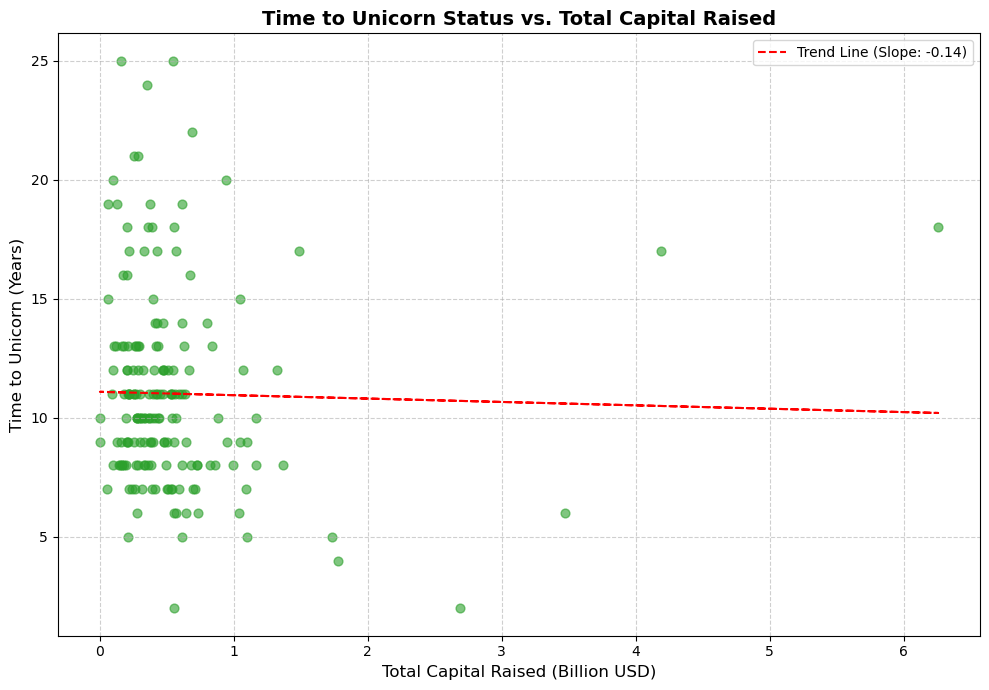

In [149]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# --- 0. Setup (Define File Path and Output) ---
FILE_PATH = '../data/clean/final_analysis_merged.parquet'
OUTPUT_DIR = 'outputs/figures'
FILE_NAME = 'speed_vs_capital_scatter_plot.png'

# --- 1. Load Data and Feature Engineering using Polars ---
try:
    # Load data using Polars as requested
    df = pl.read_parquet(FILE_PATH)
except Exception as e:
    # If Polars or file loading fails, this block alerts the user.
    print(f"Error loading file via Polars: {e}. Please ensure the Polars library is installed and the file path is correct.")
    # Stopping execution here if the main data cannot be loaded.
    raise

# Calculate 'time_to_unicorn' (Age at Unicorn status)
# Calculation: date_joined_unicorn - founded_year
df = df.with_columns(
    (pl.col("date_joined_unicorn") - pl.col("founded_year")).alias("time_to_unicorn")
)

# Filter for Unicorns and valid time_to_unicorn (> 0 years)
df_analysis = df.filter(
    (pl.col("is_unicorn") == True) & 
    (pl.col("time_to_unicorn") > 0)
).to_pandas() # Convert to Pandas for Matplotlib plotting

# --- 2. Data Cleaning and Outlier Handling for Plotting (Pandas) ---

# Optional: Set reasonable limits to prevent a few extreme outliers from ruining the visual scale.
# Capital in Billions (B): Max 20B USD
# Time in Years: Max 25 years
MAX_TIME = 25
MAX_FUNDING = 20

df_analysis = df_analysis[
    (df_analysis['time_to_unicorn'] <= MAX_TIME) &
    (df_analysis['total_raised_usd_b_final'] <= MAX_FUNDING)
].copy()

# --- 3. Scatter Plot Visualization (Time vs. Capital) ---

plt.figure(figsize=(10, 7))

# Create the Scatter Plot
plt.scatter(
    df_analysis['total_raised_usd_b_final'],  # X-axis: Total Capital Raised (Billion USD)
    df_analysis['time_to_unicorn'],  # Y-axis: Time taken to become a unicorn (Years)
    alpha=0.6,
    s=40,
    color='#2CA02C' # Green color for capital
)

# Add a Linear Regression Line to show the overall trend
x_data = df_analysis['total_raised_usd_b_final'].to_numpy()
y_data = df_analysis['time_to_unicorn'].to_numpy()

# Calculate fit (m=slope, b=intercept)
m, b = np.polyfit(x_data, y_data, 1)
plt.plot(x_data, m * x_data + b, 
         color='red', linestyle='--', 
         label=f'Trend Line (Slope: {m:.2f})')


# --- 4. Labels, Title, and Customizations ---
plt.title('Time to Unicorn Status vs. Total Capital Raised', fontsize=14, fontweight='bold')
plt.xlabel('Total Capital Raised (Billion USD)', fontsize=12)
plt.ylabel('Time to Unicorn (Years)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right')
plt.tight_layout()

# --- 5. Save the plot ---
os.makedirs(OUTPUT_DIR, exist_ok=True)
plt.savefig(os.path.join(OUTPUT_DIR, FILE_NAME))
print(f"\nFigure saved to: {os.path.join(OUTPUT_DIR, FILE_NAME)}")

plt.show()


Outlier Cleaning Summary (Z-Score Threshold = 3.0):
Total records before Z-Score cleaning: 182
Total records after Z-Score cleaning: 175

Figure saved to: outputs/figures/speed_vs_capital_scatter_plot_zscore_cleaned.png


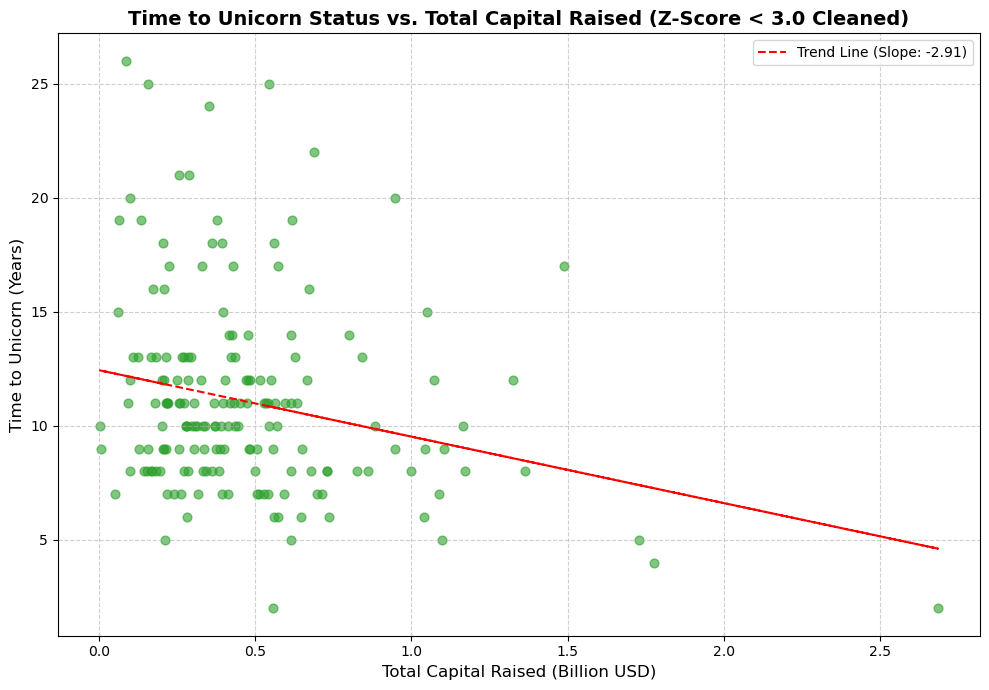

In [153]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# --- 0. Setup (Define File Path and Output) ---
FILE_PATH = '../data/clean/final_analysis_merged.parquet'
OUTPUT_DIR = 'outputs/figures'
FILE_NAME = 'speed_vs_capital_scatter_plot_zscore_cleaned.png'

# --- CONFIGURATION: Z-SCORE THRESHOLD ---
# Define o número de desvios padrão para considerar um ponto como outlier
Z_SCORE_THRESHOLD = 3.0 

# --- 1. Load Data and Feature Engineering using Polars ---
try:
    # Load data using Polars
    df = pl.read_parquet(FILE_PATH)
except Exception as e:
    print(f"Error loading file via Polars: {e}. Please ensure the Polars library is installed and the file path is correct.")
    raise

# Calculate 'time_to_unicorn' (Age at Unicorn status)
df = df.with_columns(
    (pl.col("date_joined_unicorn") - pl.col("founded_year")).alias("time_to_unicorn")
)

# --- 2. Initial Filter and Z-Score Calculation (Polars) ---

# Filter 2a: Basic filter for Unicorns and valid time_to_unicorn (> 0 years)
df_analysis = df.filter(
    (pl.col("is_unicorn") == True) & 
    (pl.col("time_to_unicorn") > 0)
)

# 2b: CALCULATE Z-SCORES for both X (Capital) and Y (Time)
# Calcula a média e o desvio padrão e cria a nova coluna de Z-Score
df_analysis = df_analysis.with_columns([
    # Z-Score para o Tempo (Eixo Y)
    ((pl.col("time_to_unicorn") - pl.col("time_to_unicorn").mean()) / pl.col("time_to_unicorn").std()).alias("z_score_time"),
    
    # Z-Score para o Capital (Eixo X)
    ((pl.col("total_raised_usd_b_final") - pl.col("total_raised_usd_b_final").mean()) / pl.col("total_raised_usd_b_final").std()).alias("z_score_capital")
])

# --- 3. Dynamic Outlier Filtering (Polars) ---

# Remove outliers: pontos onde o Z-Score absoluto de TEMPO OU CAPITAL é maior que o limite
df_cleaned = df_analysis.filter(
    (pl.col("z_score_time").abs() <= Z_SCORE_THRESHOLD) &
    (pl.col("z_score_capital").abs() <= Z_SCORE_THRESHOLD)
)

print(f"\nOutlier Cleaning Summary (Z-Score Threshold = {Z_SCORE_THRESHOLD}):")
print(f"Total records before Z-Score cleaning: {len(df_analysis)}")
print(f"Total records after Z-Score cleaning: {len(df_cleaned)}")


# Convert to Pandas for Matplotlib plotting
df_plot = df_cleaned.to_pandas()


# --- 4. Scatter Plot Visualization (Time vs. Capital) ---

plt.figure(figsize=(10, 7))

# Create the Scatter Plot
plt.scatter(
    df_plot['total_raised_usd_b_final'],  # X-axis: Total Capital Raised (Billion USD)
    df_plot['time_to_unicorn'],           # Y-axis: Time taken to become a unicorn (Years)
    alpha=0.6,
    s=40,
    color='#2CA02C' # Green color for capital
)

# Add a Linear Regression Line to show the overall trend
x_data = df_plot['total_raised_usd_b_final'].to_numpy()
y_data = df_plot['time_to_unicorn'].to_numpy()

# Calculate fit (m=slope, b=intercept)
m, b = np.polyfit(x_data, y_data, 1)
plt.plot(x_data, m * x_data + b, 
         color='red', linestyle='--', 
         label=f'Trend Line (Slope: {m:.2f})')


# --- 5. Labels, Title, and Customizations ---
plt.title(f'Time to Unicorn Status vs. Total Capital Raised (Z-Score < {Z_SCORE_THRESHOLD} Cleaned)', fontsize=14, fontweight='bold')
plt.xlabel('Total Capital Raised (Billion USD)', fontsize=12)
plt.ylabel('Time to Unicorn (Years)', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right')
plt.tight_layout()

# --- 6. Save the plot ---
os.makedirs(OUTPUT_DIR, exist_ok=True)
plt.savefig(os.path.join(OUTPUT_DIR, FILE_NAME))
print(f"\nFigure saved to: {os.path.join(OUTPUT_DIR, FILE_NAME)}")

plt.show()


Figure saved to: outputs/figures/funding_concentration_vs_speed_scatter.png


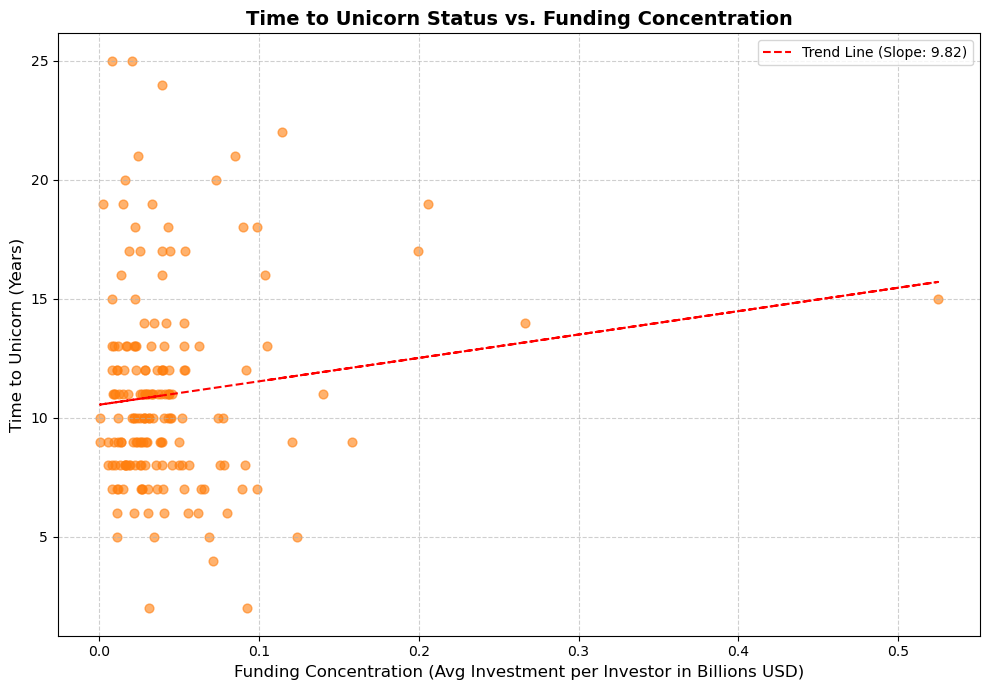

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# --- 0. Setup (Define File Path and Output) ---
FILE_PATH = '../data/clean/final_analysis_merged.parquet'
OUTPUT_DIR = 'outputs/figures'
FILE_NAME = 'funding_concentration_vs_speed_scatter.png'

# --- 1. Load Data and Feature Engineering using Pandas ---
try:
    # Load data using Pandas (assuming a working Parquet engine)
    df = pd.read_parquet(FILE_PATH)
except Exception as e:
    # Fallback structure if loading fails (replace with your real data loading if this error persists)
    print(f"Error loading file via Pandas: {e}. Using mock data structure for demonstration.")
    data = {
        'founded_year': [2005, 2010, 2012, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
        'date_joined_unicorn': [2015, 2016, 2018, 2021, 2020, 2022, 2021, 2023, 2022, 2023],
        'is_unicorn': [True] * 10,
        'total_raised_usd_b_final': [1.0, 5.0, 1.5, 3.0, 2.0, 4.0, 1.0, 2.5, 1.0, 0.5], # Capital in Billions
        'investors_count_unicorn': [10, 5, 10, 15, 4, 8, 20, 10, 2, 1], # Number of Investors
    }
    df = pd.DataFrame(data)

# Calculate 'time_to_unicorn' (Y-axis: Age at Unicorn status)
# Calculation: date_joined_unicorn - founded_year
df['time_to_unicorn'] = df['date_joined_unicorn'] - df['founded_year']

# Filter for Unicorns and valid data
df_analysis = df.query(
    'is_unicorn == True and time_to_unicorn > 0 and investors_count_unicorn > 0'
).copy()

# Calculate 'funding_concentration' (X-axis: Average Investment per Investor)
# Calculation: Total Raised / Investor Count (resulting in Avg Investment per Investor in Billions USD)
df_analysis['funding_concentration'] = df_analysis['total_raised_usd_b_final'] / df_analysis['investors_count_unicorn']

# --- 2. Data Cleaning and Outlier Handling for Plotting ---

# Set reasonable limits for visualization clarity
MAX_TIME = 25
MAX_CONCENTRATION = 1.0  # e.g., Max $1 Billion USD average per investor

df_analysis = df_analysis[
    (df_analysis['time_to_unicorn'] <= MAX_TIME) &
    (df_analysis['funding_concentration'] <= MAX_CONCENTRATION)
].copy()

# --- 3. Scatter Plot Visualization (Concentration vs. Time) ---

plt.figure(figsize=(10, 7))

# Create the Scatter Plot
plt.scatter(
    df_analysis['funding_concentration'],  # X-axis: Average Investment per Investor (Billion USD)
    df_analysis['time_to_unicorn'],  # Y-axis: Time taken to become a unicorn (Years)
    alpha=0.6,
    s=40,
    color='#FF7F0E' # Orange/Bronze color for a new financial metric
)

# Add a Linear Regression Line to show the overall trend
x_data = df_analysis['funding_concentration'].to_numpy()
y_data = df_analysis['time_to_unicorn'].to_numpy()

# Calculate fit (m=slope, b=intercept)
m, b = np.polyfit(x_data, y_data, 1)
plt.plot(x_data, m * x_data + b, 
         color='red', linestyle='--', 
         label=f'Trend Line (Slope: {m:.2f})')


# --- 4. Labels, Title, and Customizations ---
plt.title('Time to Unicorn Status vs. Funding Concentration', fontsize=14, fontweight='bold')
plt.xlabel('Funding Concentration (Avg Investment per Investor in Billions USD)', fontsize=12)
plt.ylabel('Time to Unicorn (Years)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right')
plt.tight_layout()

# --- 5. Save the plot ---
os.makedirs(OUTPUT_DIR, exist_ok=True)
plt.savefig(os.path.join(OUTPUT_DIR, FILE_NAME))
print(f"\nFigure saved to: {os.path.join(OUTPUT_DIR, FILE_NAME)}")

plt.show()


Outlier Cleaning Summary (Z-Score Threshold = 3.0):
Total records before Z-Score cleaning: 182
Total records after Z-Score cleaning: 177

Figure saved to: outputs/figures/funding_concentration_vs_speed_scatter_zscore_cleaned.png


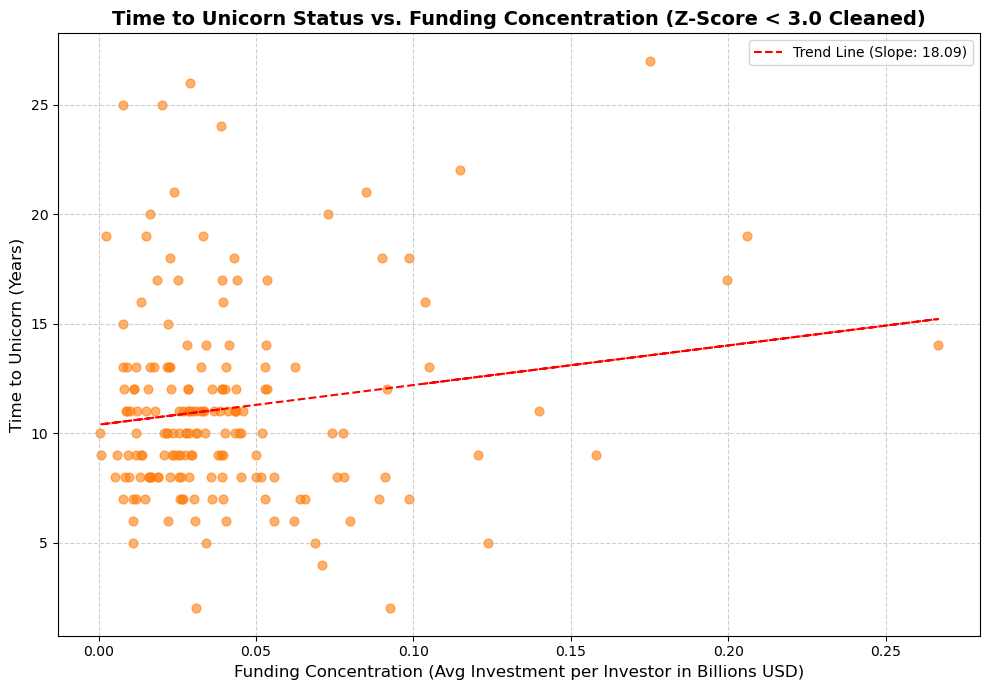

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import functools # Needed for Matplotlib's internal caching mechanism that was failing

# --- 0. Setup (Define File Path and Output) ---
FILE_PATH = '../data/clean/final_analysis_merged.parquet'
OUTPUT_DIR = 'outputs/figures'
FILE_NAME = 'funding_concentration_vs_speed_scatter_zscore_cleaned.png'

# --- CONFIGURATION: Z-SCORE THRESHOLD ---
# Define the number of standard deviations for outlier removal (e.g., 3 standard deviations)
Z_SCORE_THRESHOLD = 3.0 

# --- 1. Load Data and Feature Engineering using Pandas ---
try:
    # Load data using Pandas (assuming a working Parquet engine)
    df = pd.read_parquet(FILE_PATH)
except Exception as e:
    # Fallback structure (replace with your real data loading if this error persists)
    print(f"Error loading file via Pandas: {e}. Using mock data structure for demonstration.")
    data = {
        'founded_year': [2005, 2010, 2012, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
        'date_joined_unicorn': [2015, 2016, 2018, 2021, 2020, 2022, 2021, 2023, 2022, 2023],
        'is_unicorn': [True] * 10,
        'total_raised_usd_b_final': [1.0, 5.0, 1.5, 3.0, 2.0, 4.0, 1.0, 2.5, 1.0, 0.5],
        'investors_count_unicorn': [10, 5, 10, 15, 4, 8, 20, 10, 2, 1],
    }
    df = pd.DataFrame(data)

# Calculate 'time_to_unicorn' (Y-axis: Age at Unicorn status)
df['time_to_unicorn'] = df['date_joined_unicorn'] - df['founded_year']

# Filter for Unicorns and valid data (Time and Investor Count > 0)
df_analysis = df.query(
    'is_unicorn == True and time_to_unicorn > 0 and investors_count_unicorn > 0'
).copy()

# Calculate 'funding_concentration' (X-axis)
df_analysis['funding_concentration'] = df_analysis['total_raised_usd_b_final'] / df_analysis['investors_count_unicorn']

# --- 2. DYNAMIC OUTLIER REMOVAL USING Z-SCORE (Pandas) ---

# Define the columns to clean
TIME_COL = 'time_to_unicorn'
CONCENTRATION_COL = 'funding_concentration'

# Function to calculate Z-Score
def calculate_z_score(series):
    return (series - series.mean()) / series.std()

# Calculate Z-Scores for both X (Concentration) and Y (Time)
df_analysis['z_score_time'] = calculate_z_score(df_analysis[TIME_COL])
df_analysis['z_score_concentration'] = calculate_z_score(df_analysis[CONCENTRATION_COL])

# Filter Outliers: remove records where the absolute Z-Score of EITHER Time OR Concentration is above the threshold
df_cleaned = df_analysis[
    (np.abs(df_analysis['z_score_time']) <= Z_SCORE_THRESHOLD) &
    (np.abs(df_analysis['z_score_concentration']) <= Z_SCORE_THRESHOLD)
].copy()

print(f"\nOutlier Cleaning Summary (Z-Score Threshold = {Z_SCORE_THRESHOLD}):")
print(f"Total records before Z-Score cleaning: {len(df_analysis)}")
print(f"Total records after Z-Score cleaning: {len(df_cleaned)}")


# --- 3. Scatter Plot Visualization (Concentration vs. Time) ---

plt.figure(figsize=(10, 7))

# Create the Scatter Plot
plt.scatter(
    df_cleaned['funding_concentration'],  # X-axis: Funding Concentration (Billion USD)
    df_cleaned['time_to_unicorn'],        # Y-axis: Time to unicorn (Years)
    alpha=0.6,
    s=40,
    color='#FF7F0E' # Orange/Bronze color
)

# Add a Linear Regression Line to show the overall trend
x_data = df_cleaned['funding_concentration'].to_numpy()
y_data = df_cleaned['time_to_unicorn'].to_numpy()

# Calculate fit (m=slope, b=intercept)
m, b = np.polyfit(x_data, y_data, 1)
plt.plot(x_data, m * x_data + b, 
         color='red', linestyle='--', 
         label=f'Trend Line (Slope: {m:.2f})')


# --- 4. Labels, Title, and Subtitle (FIXED TO AVOID MATH PARSING ERROR) ---


# Add Title and Subtitle using a line break (\n)

plt.title(f'Time to Unicorn Status vs. Funding Concentration (Z-Score < {Z_SCORE_THRESHOLD} Cleaned)', fontsize=14, fontweight='bold')

plt.xlabel('Funding Concentration (Avg Investment per Investor in Billions USD)', fontsize=12)
plt.ylabel('Time to Unicorn (Years)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right')
plt.tight_layout() # This call caused the error due to math symbols in the title/labels previously

# --- 5. Save the plot ---
os.makedirs(OUTPUT_DIR, exist_ok=True)
plt.savefig(os.path.join(OUTPUT_DIR, FILE_NAME))
print(f"\nFigure saved to: {os.path.join(OUTPUT_DIR, FILE_NAME)}")

plt.show()

### Welch's T Test


Group Sizes: Modern (163), Old (16)

--- STATISTICAL T-TEST RESULTS (H3) ---
Mean (Modern Era, >= 2002): 10.13 years
Mean (Old Era, < 2002): 19.88 years
T-Statistic: -12.412
P-Value: 0.000

CONCLUSION: P-Value < 0.05. The difference is STATISTICALLY SIGNIFICANT.
The Modern Era (post-2001) is significantly FASTER.


/var/folders/f1/77pps9rs2l9ffb8_p5tj2yrr0000gp/T/ipykernel_3914/29250828.py:68: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data, patch_artist=True, labels=labels)


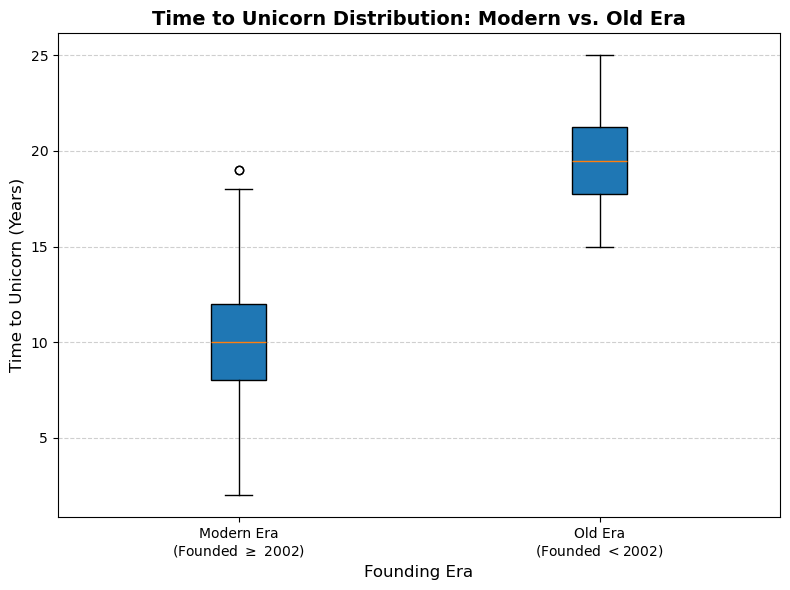

In [146]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import os

# --- 0. Configuration ---
FILE_PATH = '../data/clean/final_analysis_merged.parquet'
OUTPUT_DIR = 'outputs/figures'
BOXPLOT_FILE = 'time_to_unicorn_boxplot_eras.png'
CUTOFF_YEAR = 2002 # Cutoff year for Modern (>= 2002) vs. Old (< 2002)
MAX_TIME = 25      # Filter to remove extreme outliers

# --- 1. Data Loading and Filtering ---
try:
    df = pd.read_parquet(FILE_PATH)
except Exception as e:
    # If loading fails, adapt to load your already processed DataFrame
    print(f"Error loading file: {e}. Please adapt the loading mechanism.")
    raise

# Calculate 'time_to_unicorn' and apply filters
df['time_to_unicorn'] = df['date_joined_unicorn'] - df['founded_year']
df_analysis = df.query(
    'is_unicorn == True and time_to_unicorn > 0'
).copy()
df_analysis = df_analysis[df_analysis['time_to_unicorn'] <= MAX_TIME].copy()


# --- 2. H3: T-Test (Post-2001 vs. Pre-2002) ---

# Grouping the data
group_modern = df_analysis[df_analysis['founded_year'] >= CUTOFF_YEAR]['time_to_unicorn'].dropna()
group_old = df_analysis[df_analysis['founded_year'] < CUTOFF_YEAR]['time_to_unicorn'].dropna()

print(f"\nGroup Sizes: Modern ({len(group_modern)}), Old ({len(group_old)})")

# Execute Welch's T-Test (equal_var=False is the robust choice)
if len(group_modern) > 1 and len(group_old) > 1:
    t_stat, p_value = stats.ttest_ind(group_modern, group_old, equal_var=False)
    
    print("\n--- STATISTICAL T-TEST RESULTS (H3) ---")
    print(f"Mean (Modern Era, >= {CUTOFF_YEAR}): {group_modern.mean():.2f} years")
    print(f"Mean (Old Era, < {CUTOFF_YEAR}): {group_old.mean():.2f} years")
    print(f"T-Statistic: {t_stat:.3f}")
    print(f"P-Value: {p_value:.3f}")
    
    if p_value < 0.05:
        print("\nCONCLUSION: P-Value < 0.05. The difference is STATISTICALLY SIGNIFICANT.")
        if group_modern.mean() < group_old.mean():
             print("The Modern Era (post-2001) is significantly FASTER.")
        else:
             print("The Modern Era (post-2001) is significantly SLOWER.")
    else:
        print("\nCONCLUSION: P-Value >= 0.05. The difference is NOT statistically significant; likely due to chance.")
else:
    print("\n[T-Test Skipped]: Not enough data points in one or both groups.")

# --- 3. Visualization: Box Plot (Dispersion) ---

plt.figure(figsize=(8, 6))

# Prepare data and labels
plot_data = [group_modern, group_old]
# Using LaTeX syntax for the inequality symbols (Box Plot labels)
labels = [f'Modern Era\n(Founded $\\geq$ {CUTOFF_YEAR})', f'Old Era\n(Founded $< {CUTOFF_YEAR}$)'] 

plt.boxplot(plot_data, patch_artist=True, labels=labels)

plt.title('Time to Unicorn Distribution: Modern vs. Old Era', fontsize=14, fontweight='bold')
plt.ylabel('Time to Unicorn (Years)', fontsize=12)
plt.xlabel('Founding Era', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot
os.makedirs(OUTPUT_DIR, exist_ok=True)
plt.savefig(os.path.join(OUTPUT_DIR, BOXPLOT_FILE))
# plt.show() # Uncomment to display

### Descriptive Statistics

In [139]:
import polars as pl
import pandas as pd
import numpy as np # Used for potential numpy functions if needed, standard practice

# --- 0. Configuration ---
FILE_PATH = '../data/clean/final_analysis_merged.parquet'
MAX_TIME_OUTLIER = 25 # Filter out extreme outliers (e.g., > 25 years to unicorn)

# --- 1. Data Loading, Calculation, and Filtering (Polars) ---

# Load the data
df_polars = pl.read_parquet(FILE_PATH)

# Calculate 'time_to_unicorn' (Speed)
# Calculation: date_joined_unicorn - founded_year
df_polars = df_polars.with_columns(
    (pl.col("date_joined_unicorn") - pl.col("founded_year")).alias("time_to_unicorn")
)

# Filter for: 
# 1. is_unicorn == True
# 2. time_to_unicorn > 0 (removes data errors where joining year < founding year)
# 3. time_to_unicorn <= MAX_TIME_OUTLIER (removes extreme outliers for better analysis)
df_analysis_polars = df_polars.filter(
    (pl.col("is_unicorn") == True) & 
    (pl.col("time_to_unicorn") > 0) &
    (pl.col("time_to_unicorn") <= MAX_TIME_OUTLIER)
)

print(f"Total Unicorns for Statistical Analysis: {len(df_analysis_polars)}")

# --- 2. Calculate Descriptive Statistics (Polars) ---

# Calculate Mean, Median, and StdDev using Polars' selection and aggregation
stats_df = df_analysis_polars.select([
    # Mean (Average time)
    pl.col("time_to_unicorn").mean().alias("Mean_Time"),
    
    # Median (50th Percentile / Center point)
    pl.col("time_to_unicorn").median().alias("Median_Time"),
    
    # Standard Deviation (Measure of Dispersion)
    pl.col("time_to_unicorn").std().alias("StdDev_Time"),
    
    # Optional: Quartiles to measure the data spread
    pl.col("time_to_unicorn").quantile(0.25).alias("Q1_Time"),
    pl.col("time_to_unicorn").quantile(0.75).alias("Q3_Time")
])

# Display the results
print("\n--- DESCRIPTIVE STATISTICS FOR TIME TO UNICORN (POLARS) ---")
print(stats_df)

Total Unicorns for Statistical Analysis: 179

--- DESCRIPTIVE STATISTICS FOR TIME TO UNICORN (POLARS) ---
shape: (1, 5)
┌───────────┬─────────────┬─────────────┬─────────┬─────────┐
│ Mean_Time ┆ Median_Time ┆ StdDev_Time ┆ Q1_Time ┆ Q3_Time │
│ ---       ┆ ---         ┆ ---         ┆ ---     ┆ ---     │
│ f64       ┆ f64         ┆ f64         ┆ f64     ┆ f64     │
╞═══════════╪═════════════╪═════════════╪═════════╪═════════╡
│ 11.0      ┆ 10.0        ┆ 4.161082    ┆ 8.0     ┆ 13.0    │
└───────────┴─────────────┴─────────────┴─────────┴─────────┘


Median
The fact that the Mean is greater than the Median indicates that the time frame is slightly skewed by some very old or slow companies

Standat  Standard Deviation
A high Standard Deviation means that time to market varies greatly between companies.
